** CHECK STATISTIC CODE

In [5]:
import os
import unittest
import numpy as np
import pandas as pd
import matplotlib
import warnings
from sklearn.datasets import make_classification, make_regression
from ProQSAR.ModelDeveloper.model_validation import ModelValidation
from ProQSAR.ModelDeveloper.model_developer import ModelDeveloper
from ProQSAR.FeatureSelector.feature_selector import FeatureSelector
from ProQSAR.FeatureSelector.feature_selector_utils import evaluate_feature_selectors
warnings.filterwarnings("ignore", category=FutureWarning)

def create_classification_data(
    n_samples=60, n_features=25, n_informative=10, random_state=42
) -> pd.DataFrame:

    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data
def create_regression_data(
    n_samples=40, n_features=20, n_informative=10, random_state=42
) -> pd.DataFrame:
    """
    Generate a DataFrame containing synthetic regression data.

    Args:
        n_samples (int): The number of samples.
        n_features (int): The number of features.
        n_informative (int): The number of informative features.
        random_state (int): Seed for random number generation.

    Returns:
        pd.DataFrame: DataFrame with features, ID, and activity columns.
    """
    X, y = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data

class_data = create_classification_data()
reg_data = create_regression_data()

fs = ModelDeveloper(
    best=True,
    scoring_list=['f1','accuracy','roc_auc'],
    n_splits=5, 
    n_repeats=5,
)
#df = fs.fit(class_data)

TypeError: ModelDeveloper.__init__() missing 2 required positional arguments: 'activity_col' and 'id_col'

In [3]:
fs.select_model

'SVC'

In [4]:
fs.comparison

scoring cv_cycle  AdaBoostClassifier  CatBoostClassifier  \
0   accuracy        1            0.583333            0.750000   
1   accuracy        2            0.583333            0.666667   
2   accuracy        3            0.833333            0.750000   
3   accuracy        4            0.750000            0.833333   
4   accuracy        5            0.833333            0.916667   
..       ...      ...                 ...                 ...   
79   roc_auc       24            0.722222            0.888889   
80   roc_auc       25            1.000000            0.944444   
81   roc_auc     mean            0.827778            0.887778   
82   roc_auc   median            0.861111            0.916667   
83   roc_auc      std            0.138109            0.092789   

    DummyClassifier  ExtraTreesClassifier  GradientBoostingClassifier  \
0               0.5              0.666667                    0.500000   
1               0.5              0.916667                    0.750000   
2               0.5              0.916667                    0.750000   
3               0.5              0.833333                    0.750000   
4               0.5              1.000000                    0.916667   
..              ...                   ...                         ...   
79              0.5              0.861111                    0.777778   
80              0.5              0.944444                    0.847222   
81              0.5              0.899444                    0.817222   
82              0.5              0.916667                    0.847222   
83              0.0              0.076707                    0.144213   

    KNeighborsClassifier  LogisticRegression  MLPClassifier  \
0               0.666667            0.500000       0.666667   
1               0.833333            0.666667       0.750000   
2               0.916667            0.666667       0.666667   
3               0.750000            0.750000       0.750000   
4               0.666667            0.833333       0.833333   
..                   ...                 ...            ...   
79              0.861111            0.888889       1.000000   
80              0.819444            0.666667       0.777778   
81              0.864444            0.764444       0.847778   
82              0.861111            0.805556       0.861111   
83              0.082988            0.120728       0.104563   

    RandomForestClassifier       SVC  XGBClassifier  
0                 0.666667  0.750000       0.666667  
1                 0.750000  0.750000       0.583333  
2                 0.750000  0.833333       0.666667  
3                 0.750000  0.750000       0.666667  
4                 0.833333  1.000000       0.916667  
..                     ...       ...            ...  
79                0.805556  0.944444       0.777778  
80                0.944444  0.944444       0.805556  
81                0.871667  0.931111       0.776667  
82                0.902778  0.944444       0.805556  
83                0.084280  0.067183       0.144973  

[84 rows x 13 columns]

In [2]:
from IPython.display import display
display(cv_result)

scoring cv_cycle  AdaBoostClassifier  CatBoostClassifier  \
0    accuracy        1            0.583333            0.750000   
1    accuracy        2            0.583333            0.666667   
2    accuracy        3            0.833333            0.750000   
3    accuracy        4            0.750000            0.833333   
4    accuracy        5            0.833333            0.916667   
..        ...      ...                 ...                 ...   
247   roc_auc       24            0.722222            0.888889   
248   roc_auc       25            1.000000            0.944444   
249   roc_auc     mean            0.827778            0.887778   
250   roc_auc   median            0.861111            0.916667   
251   roc_auc      std            0.138109            0.092789   

     DummyClassifier  ExtraTreesClassifier  GradientBoostingClassifier  \
0                0.5              0.666667                    0.500000   
1                0.5              0.916667                    0.750000   
2                0.5              0.916667                    0.750000   
3                0.5              0.833333                    0.750000   
4                0.5              1.000000                    0.916667   
..               ...                   ...                         ...   
247              0.5              0.861111                    0.777778   
248              0.5              0.944444                    0.847222   
249              0.5              0.899444                    0.817222   
250              0.5              0.916667                    0.847222   
251              0.0              0.076707                    0.144213   

     KNeighborsClassifier  LogisticRegression  MLPClassifier  \
0                0.666667            0.500000       0.666667   
1                0.833333            0.666667       0.750000   
2                0.916667            0.666667       0.666667   
3                0.750000            0.750000       0.750000   
4                0.666667            0.833333       0.833333   
..                    ...                 ...            ...   
247              0.861111            0.888889       1.000000   
248              0.819444            0.666667       0.777778   
249              0.864444            0.764444       0.847778   
250              0.861111            0.805556       0.861111   
251              0.082988            0.120728       0.104563   

     RandomForestClassifier       SVC  XGBClassifier  
0                  0.666667  0.750000       0.666667  
1                  0.750000  0.750000       0.583333  
2                  0.750000  0.833333       0.666667  
3                  0.750000  0.750000       0.666667  
4                  0.833333  1.000000       0.916667  
..                      ...       ...            ...  
247                0.805556  0.944444       0.777778  
248                0.944444  0.944444       0.805556  
249                0.871667  0.931111       0.776667  
250                0.902778  0.944444       0.805556  
251                0.084280  0.067183       0.144973  

[252 rows x 13 columns]

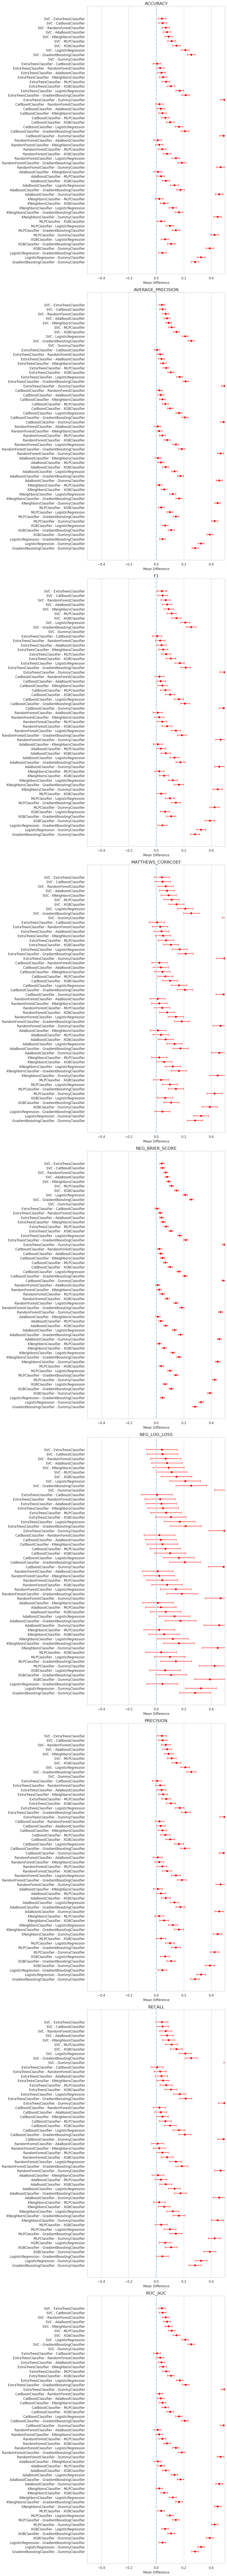

In [6]:
from ProQSAR.Analysis.statistical_analysis import StatisticalAnalysis
tukey = StatisticalAnalysis.posthoc_tukeyhsd(report_df=cv_result, plot='ci')

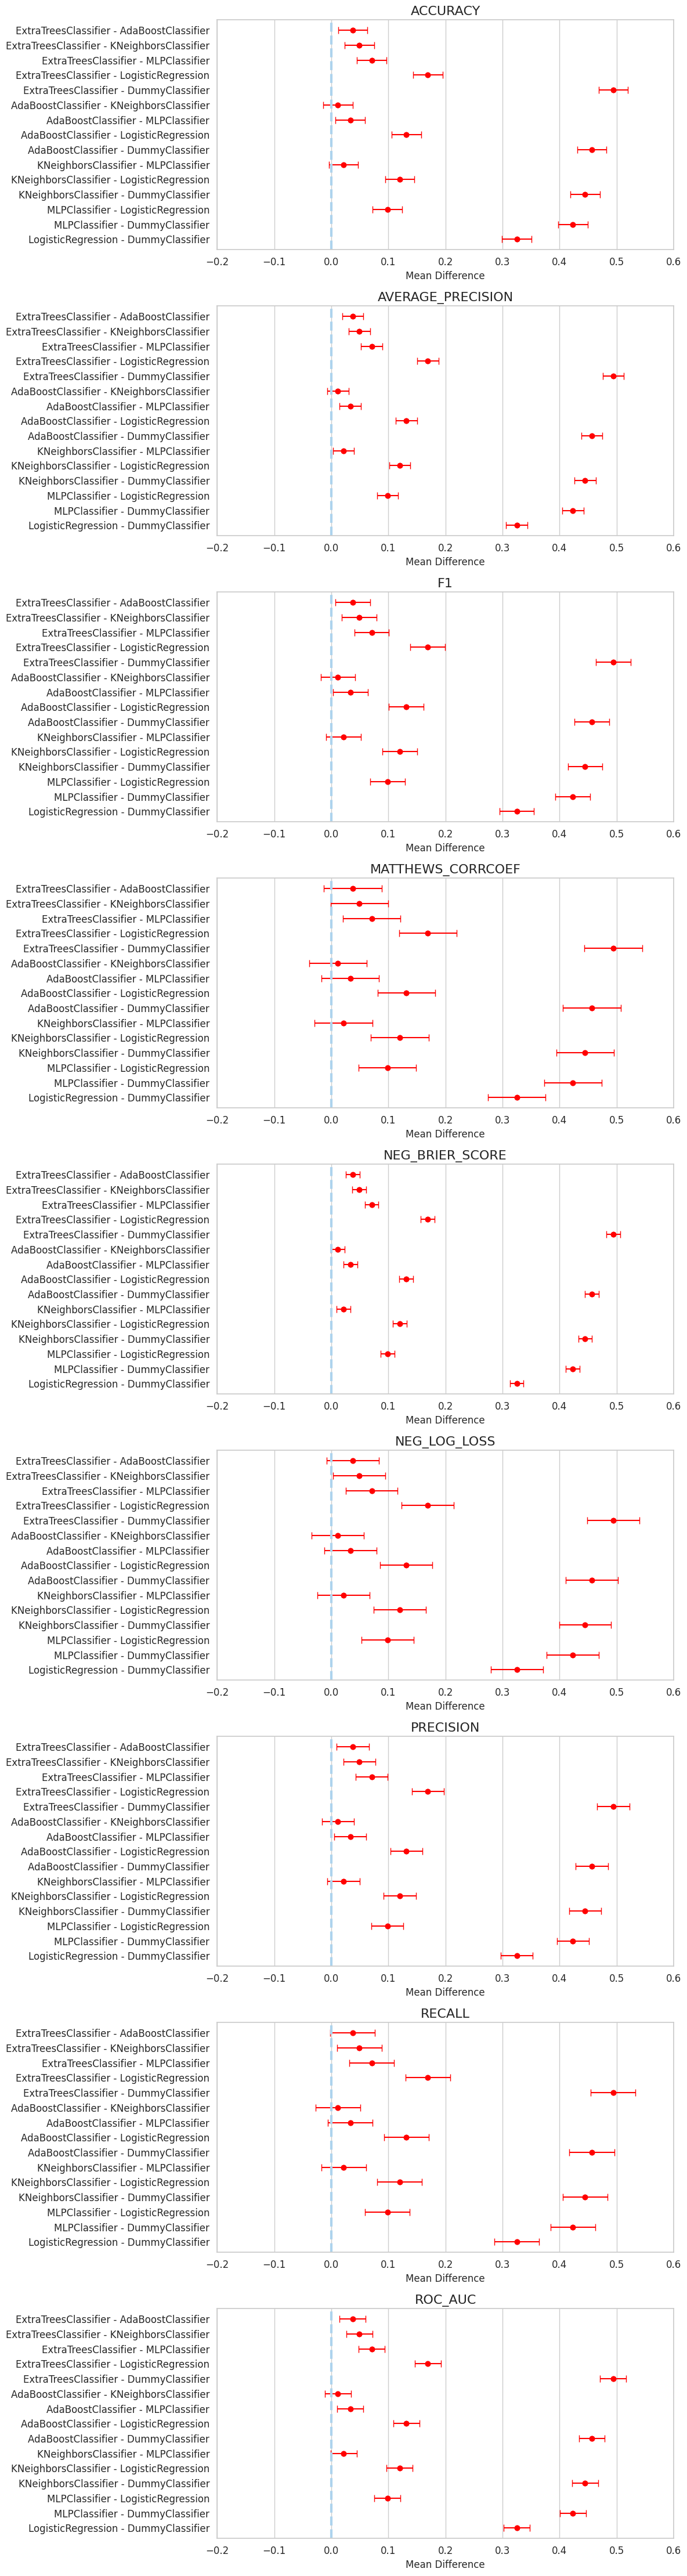

In [13]:
from ProQSAR.Analysis.statistical_analysis import StatisticalAnalysis
tukey = StatisticalAnalysis.posthoc_tukeyhsd(report_df=cv_result, plot='ci', method_list=['AdaBoostClassifier','DummyClassifier','ExtraTreesClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'MLPClassifier'], right_xlim=0.6, left_xlim=-0.2)

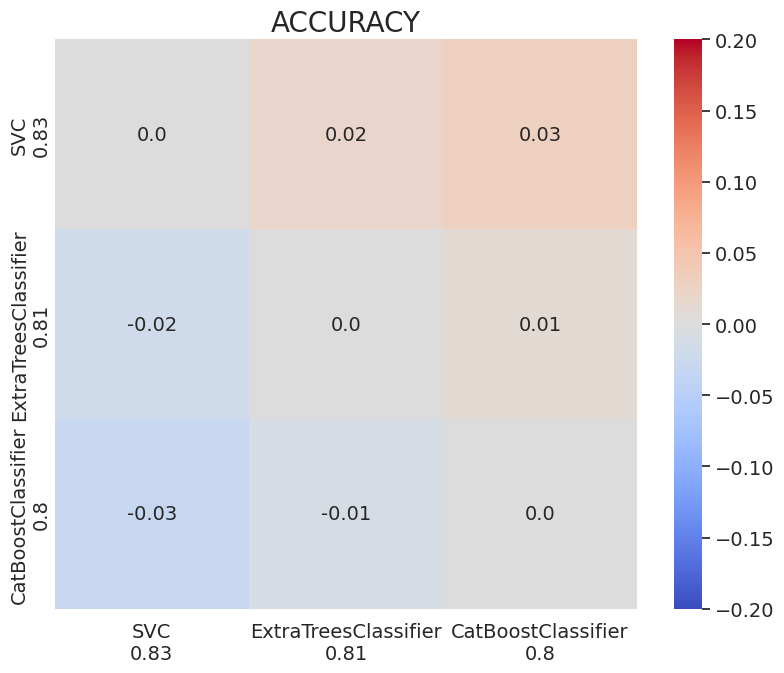

In [4]:
tukey = StatisticalAnalysis.posthoc_tukeyhsd(report_df=cv_result, title_size=20, axis_text_size=14, cell_text_size=14, plot='mcs', scoring_list='accuracy', method_list=['SVC', 'ExtraTreesClassifier', 'CatBoostClassifier'])

In [8]:
print(tukey['accuracy'])

{'result_tab':                                                                     group1  \
SVC - ExtraTreesClassifier                                             SVC   
SVC - CatBoostClassifier                                               SVC   
SVC - RandomForestClassifier                                           SVC   
SVC - AdaBoostClassifier                                               SVC   
SVC - KNeighborsClassifier                                             SVC   
SVC - MLPClassifier                                                    SVC   
SVC - XGBClassifier                                                    SVC   
SVC - LogisticRegression                                               SVC   
SVC - GradientBoostingClassifier                                       SVC   
ExtraTreesClassifier - CatBoostClassifier             ExtraTreesClassifier   
ExtraTreesClassifier - RandomForestClassifier         ExtraTreesClassifier   
ExtraTreesClassifier - AdaBoostClassifier        

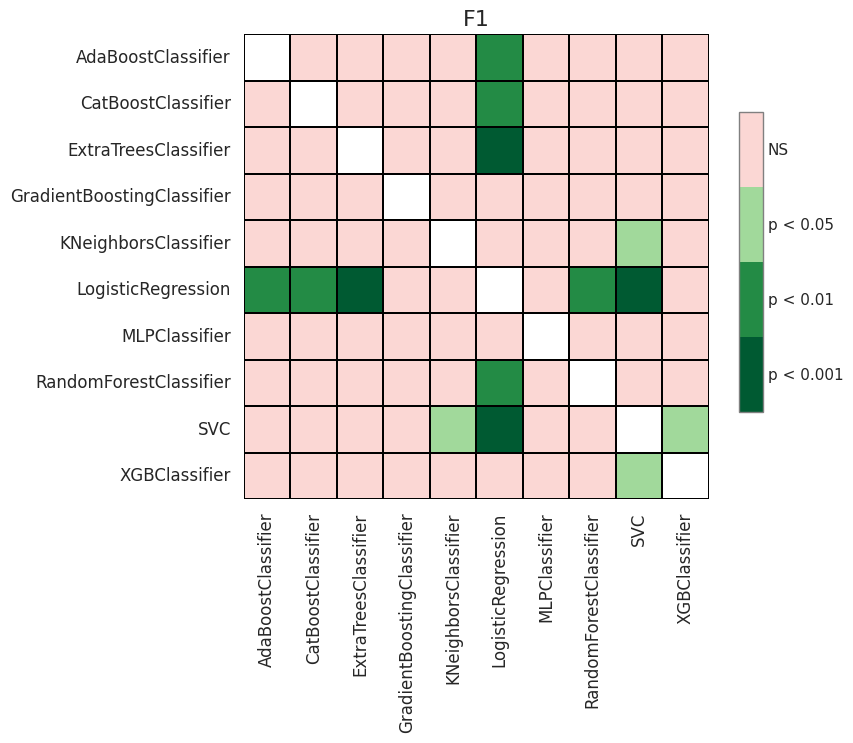

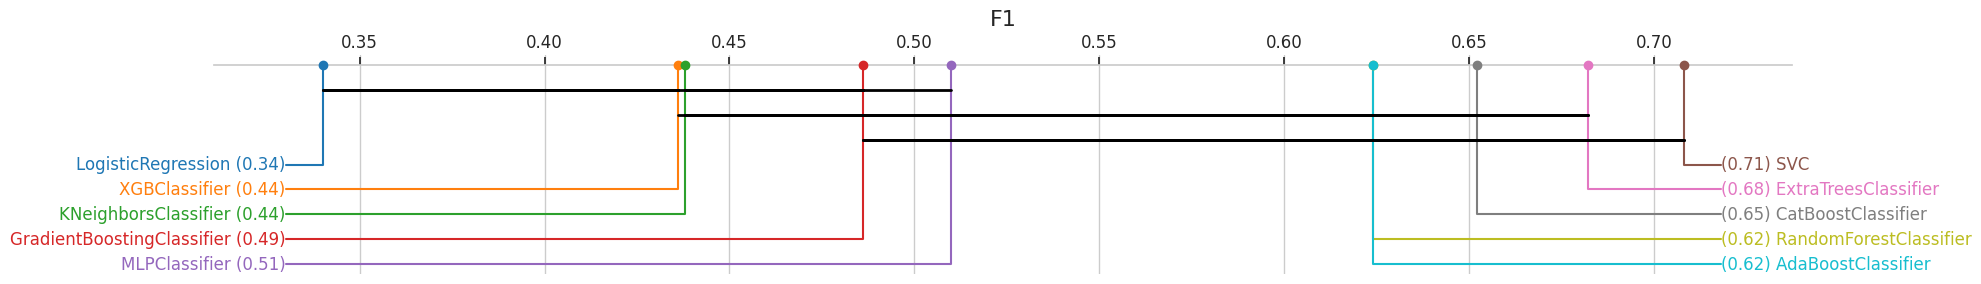

In [4]:
pc_results, rank = StatisticalAnalysis.posthoc_conover_friedman(report_df=cv_result, scoring_list='f1')

In [5]:
print(pc_results)

{'f1':                             AdaBoostClassifier  CatBoostClassifier  \
AdaBoostClassifier                    1.000000            1.000000   
CatBoostClassifier                    1.000000            1.000000   
ExtraTreesClassifier                  1.000000            1.000000   
GradientBoostingClassifier            1.000000            0.731465   
KNeighborsClassifier                  0.426840            0.173618   
LogisticRegression                    0.009376            0.002277   
MLPClassifier                         1.000000            1.000000   
RandomForestClassifier                1.000000            1.000000   
SVC                                   1.000000            1.000000   
XGBClassifier                         0.424630            0.164999   

                            ExtraTreesClassifier  GradientBoostingClassifier  \
AdaBoostClassifier                      1.000000                    1.000000   
CatBoostClassifier                      1.000000              

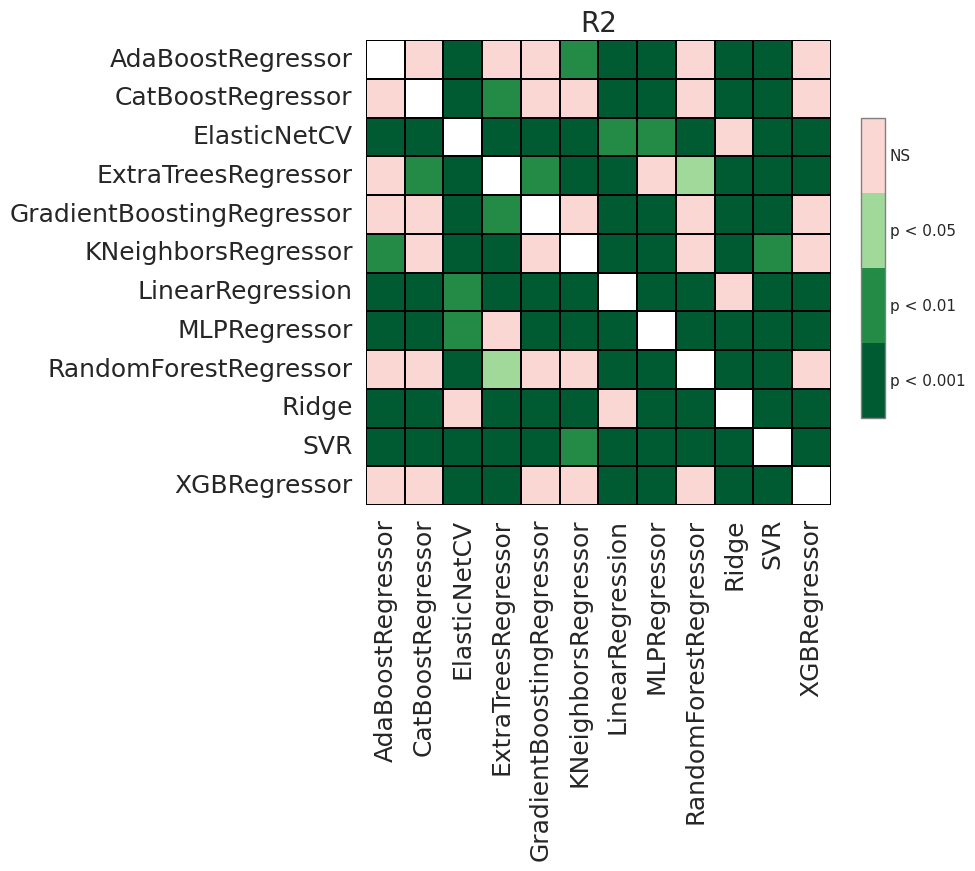

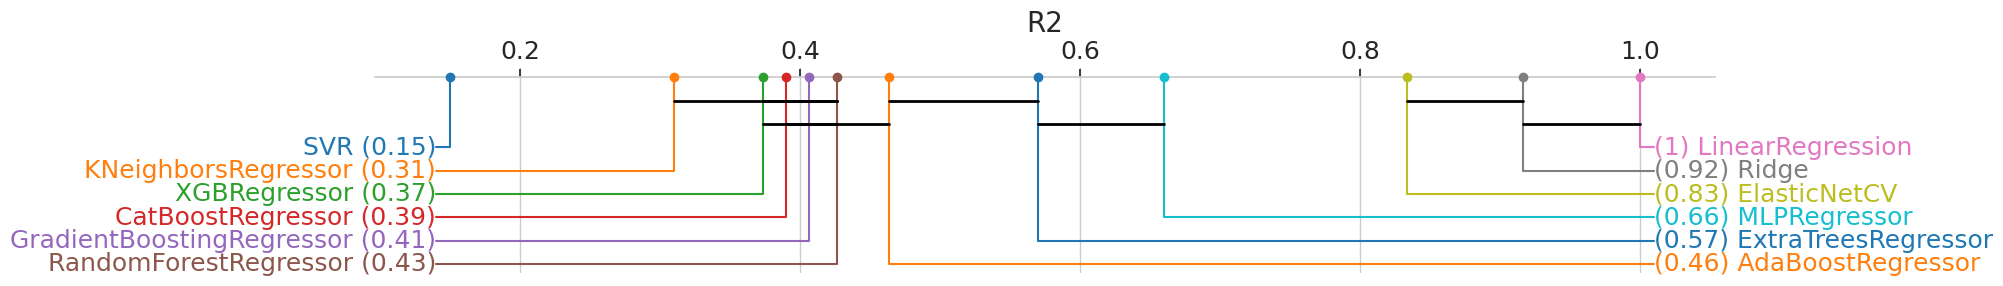

In [8]:
pc_results, rank = StatisticalAnalysis.posthoc_conover_friedman(report_df=cv_result, scoring_list='r2', axis_text_size=18, title_size=20)

/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/scikit_posthocs/_posthocs.py:734: RuntimeWarning: divide by zero encountered in scalar divide
  tval = dif / np.sqrt(A) / np.sqrt(B)


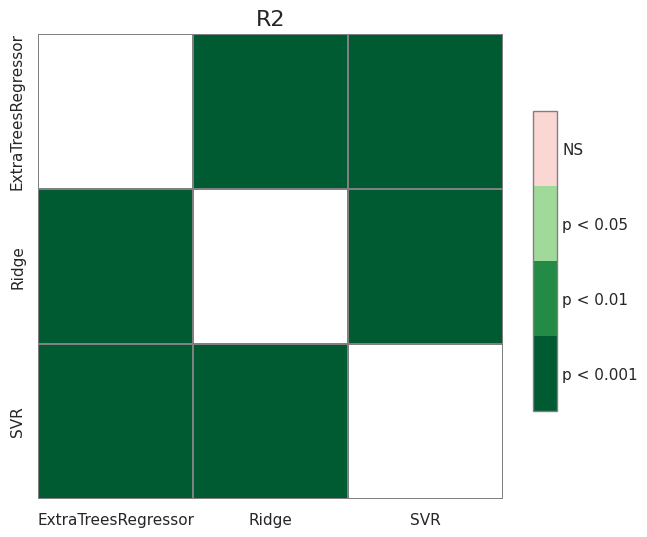

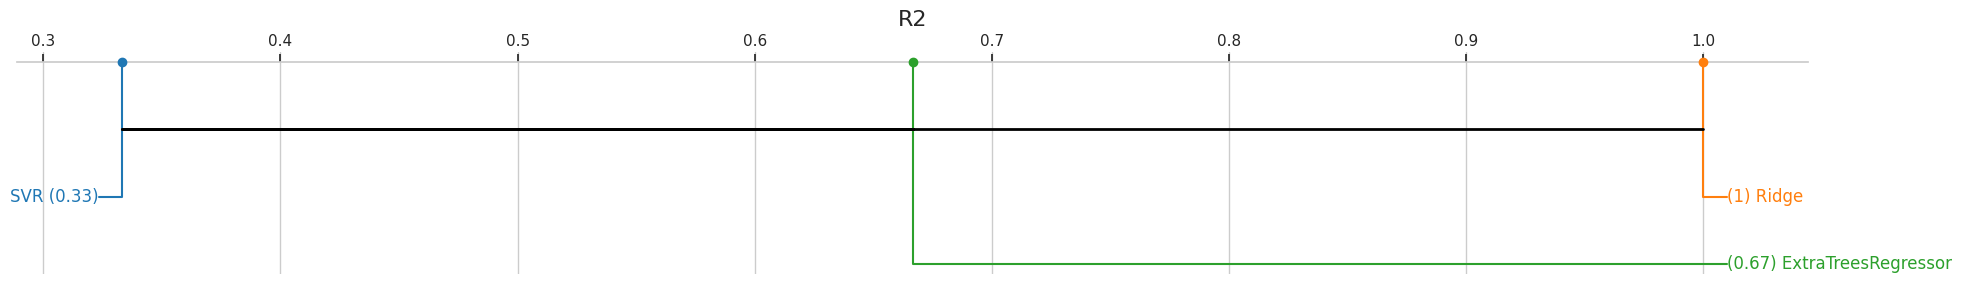

In [4]:
pc_results, rank = StatisticalAnalysis.posthoc_conover_friedman(report_df=cv_result, scoring_list="R2", method_list=["Ridge", "SVR", "ExtraTreesRegressor"])

In [5]:
display(pc_results["r2"])

ExtraTreesRegressor  Ridge  SVR
ExtraTreesRegressor                  1.0    0.0  0.0
Ridge                                0.0    1.0  0.0
SVR                                  0.0    0.0  1.0

In [6]:
display(rank["r2"])

method
ExtraTreesRegressor    0.666667
Ridge                  1.000000
SVR                    0.333333
dtype: float64

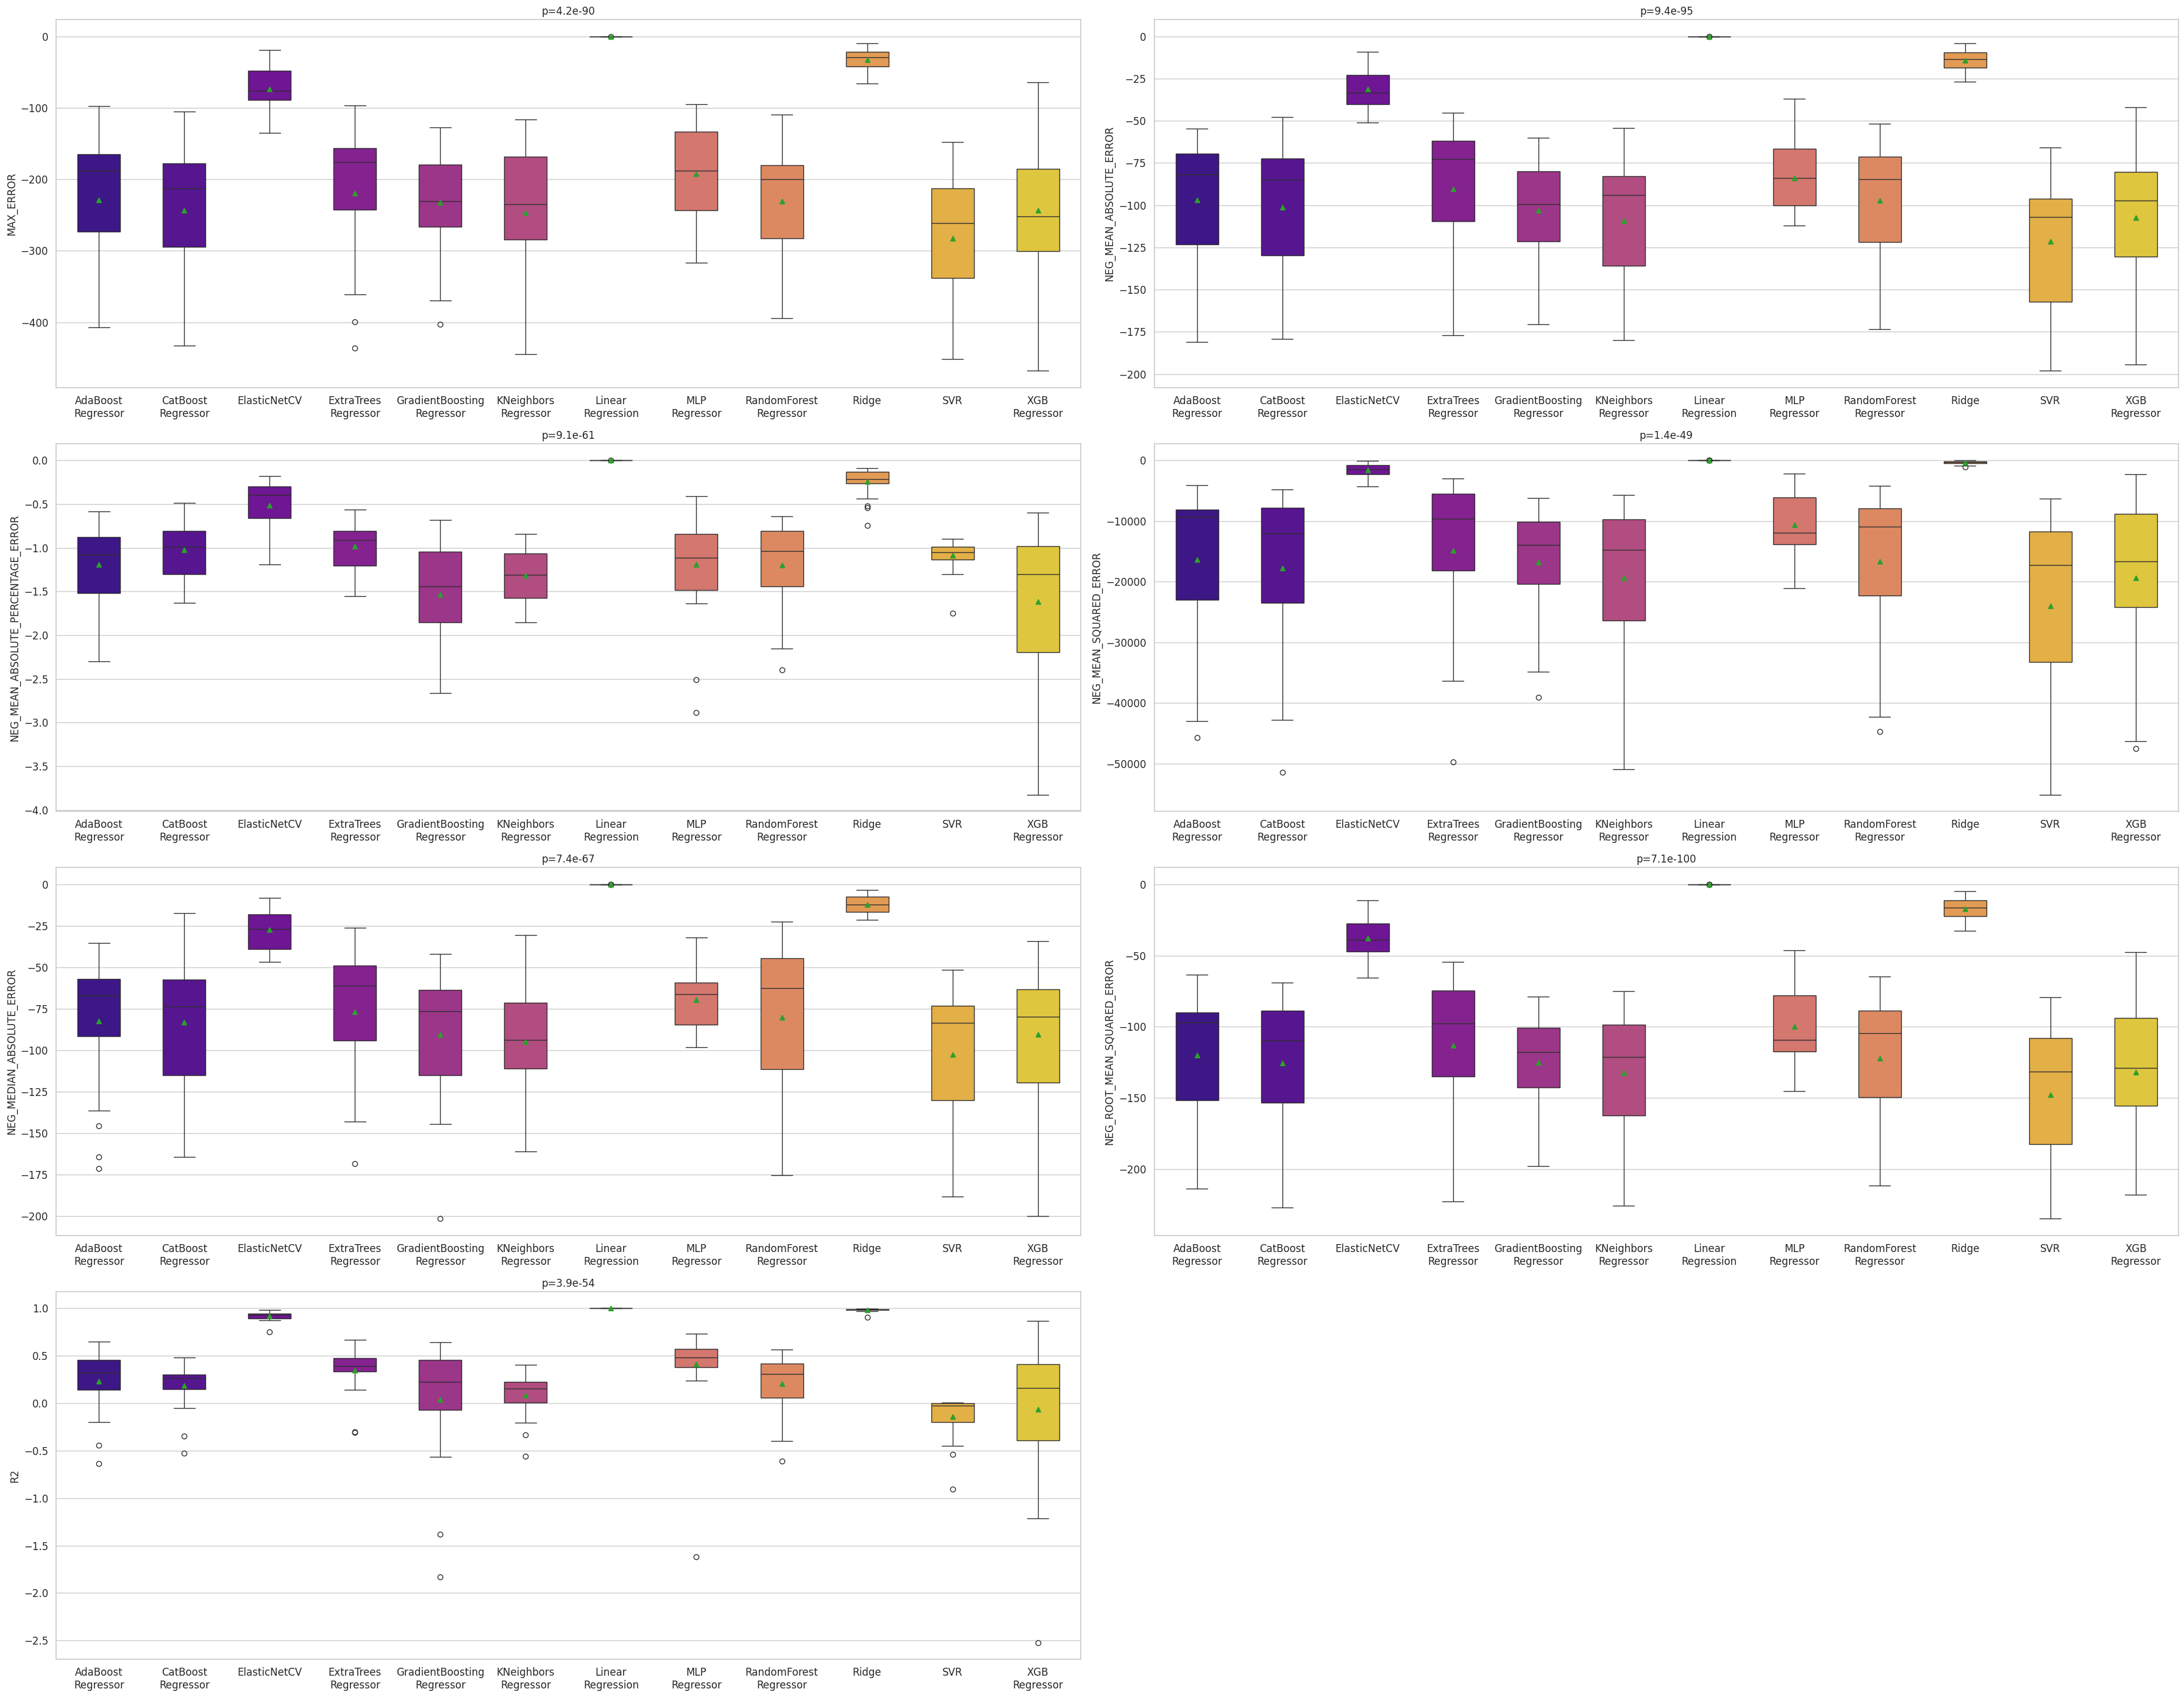

In [7]:
StatisticalAnalysis.test(report_df=cv_result, showmeans=True)

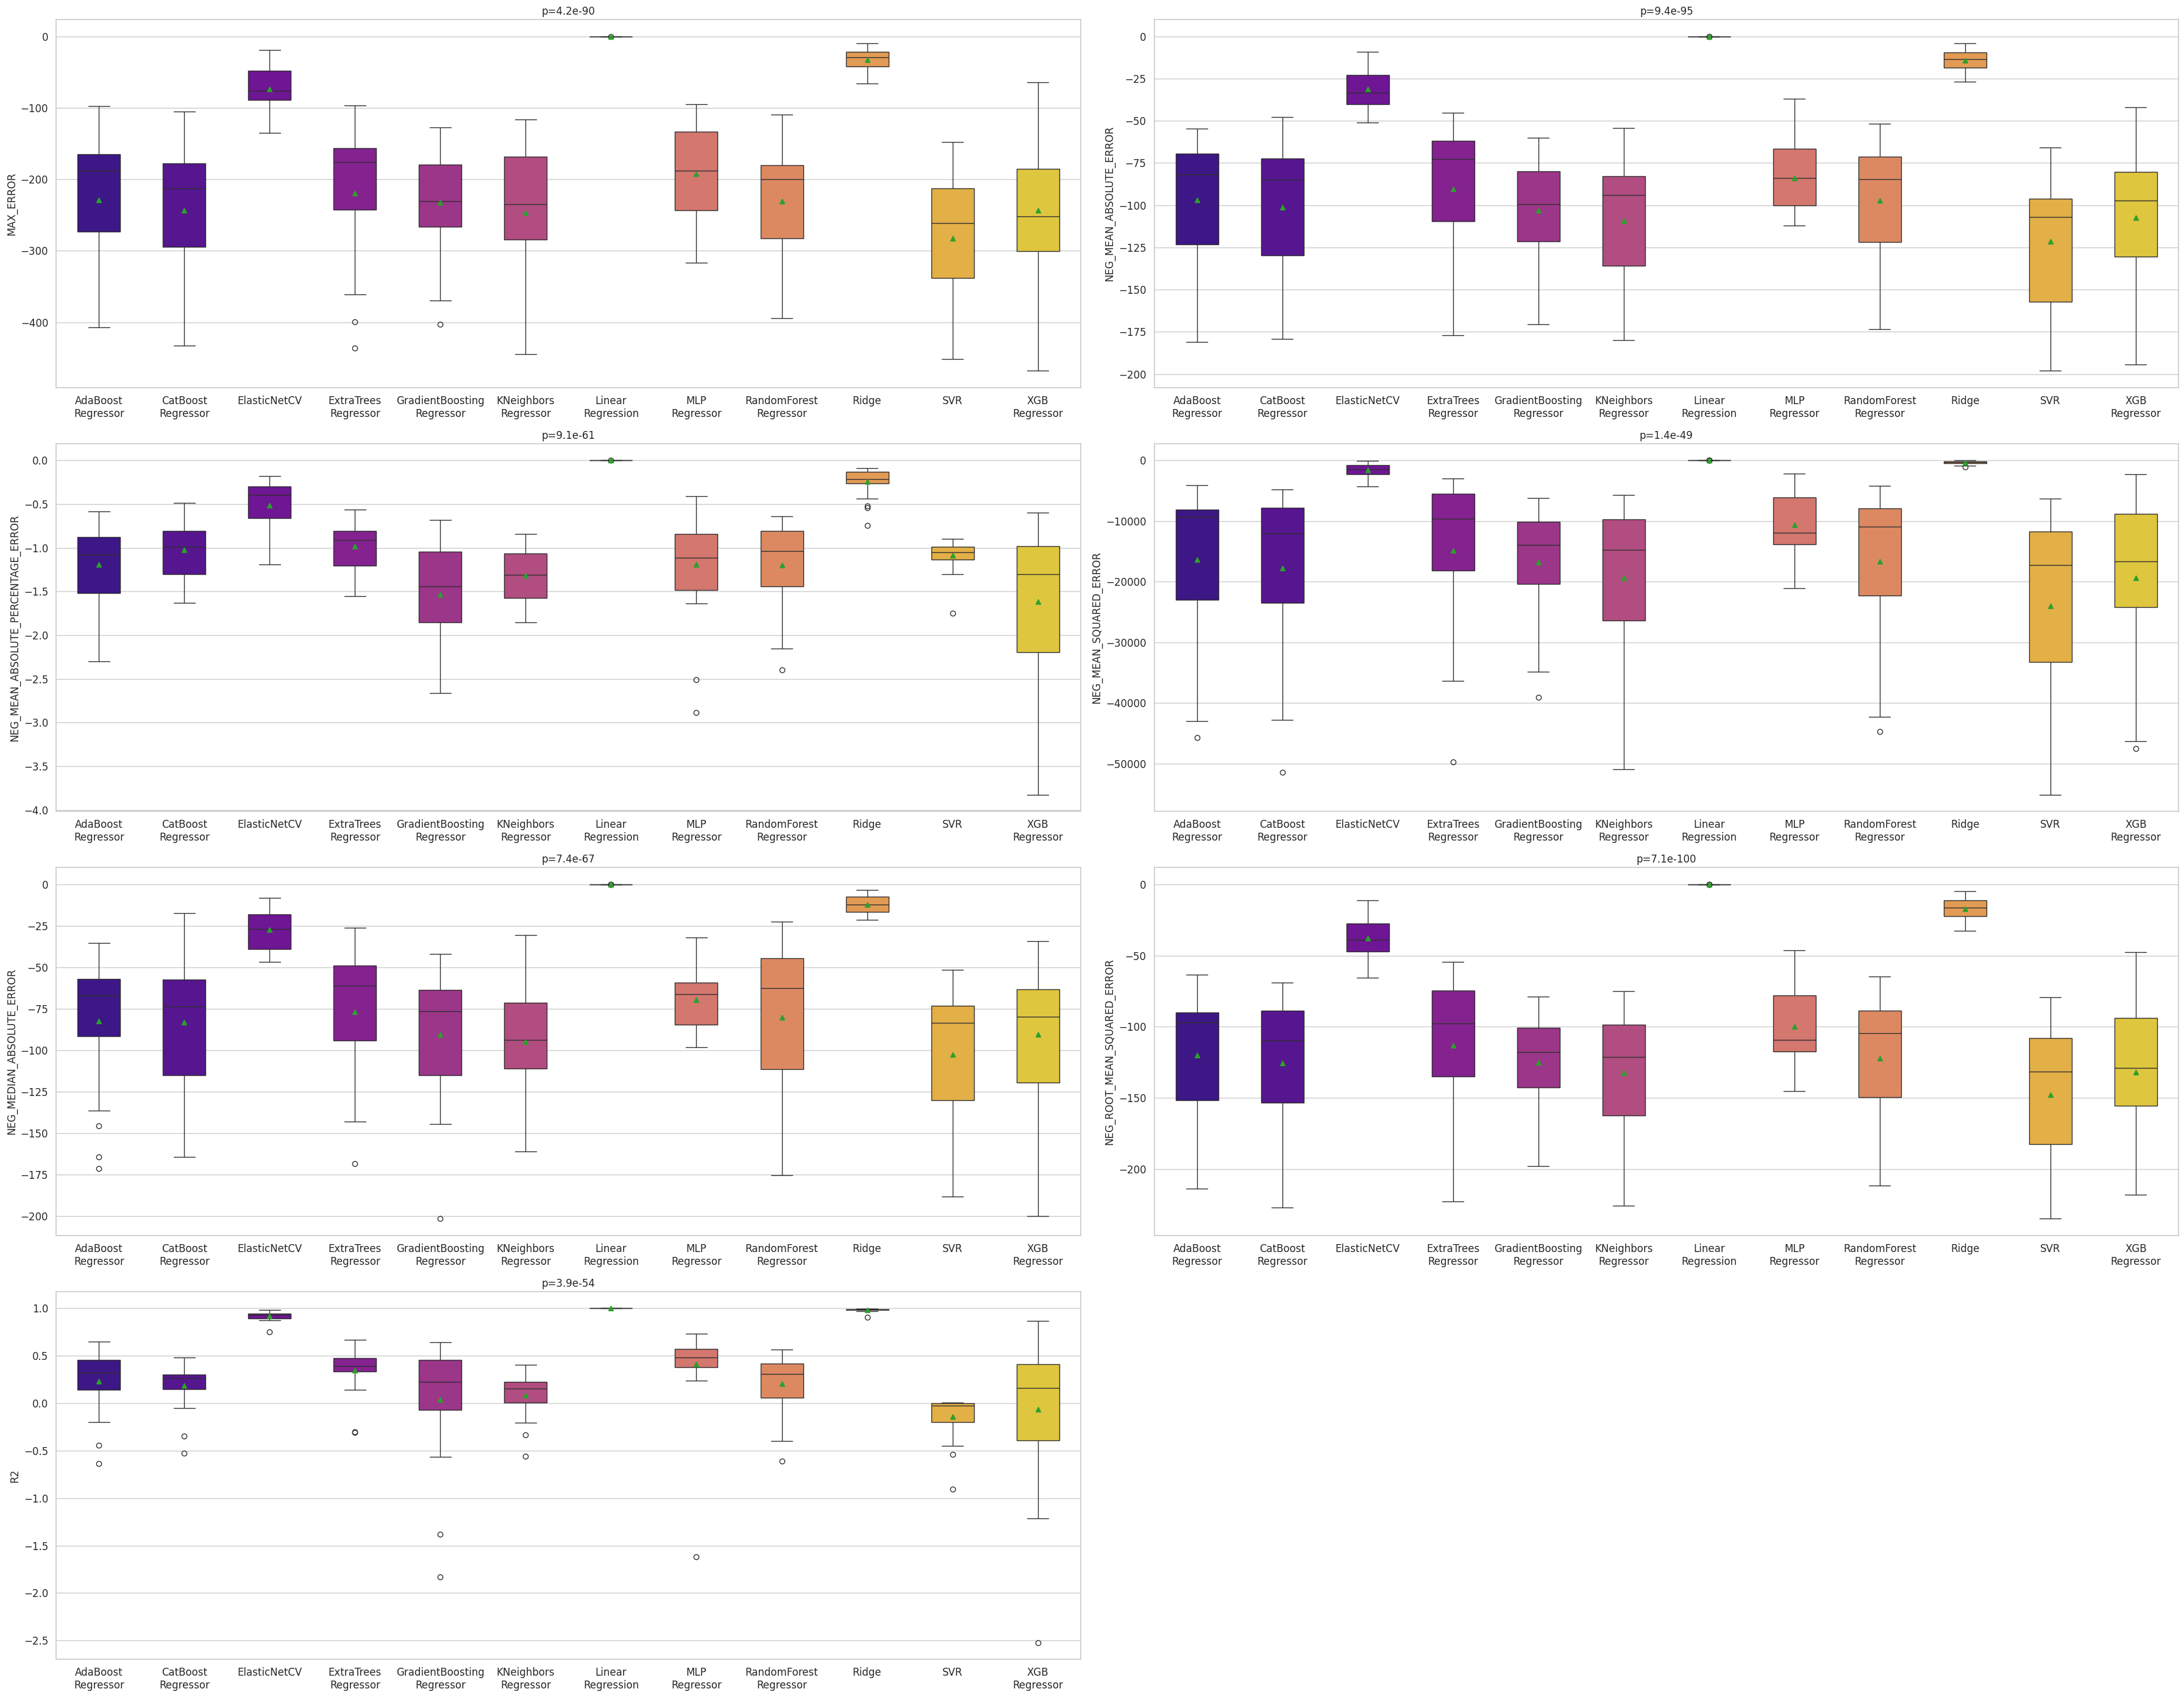

In [8]:
StatisticalAnalysis.test(report_df=cv_result, select_test="AnovaRM")

In [9]:
var = StatisticalAnalysis.check_variance_homogeneity(report_df=cv_result)
display(var)

/home/labhhc4/Documents/Workspace/Tuyet Minh/ProQSAR/ProQSAR/Analysis/statistical_analysis.py:132: RuntimeWarning: divide by zero encountered in scalar divide
  max_fold_diff = variances_by_method.max() / variances_by_method.min()


variance_fold_difference       p_value
scoring                                                                   
max_error                                       1.185660e+29  2.798995e-10
neg_mean_absolute_error                         6.080615e+28  1.109848e-10
neg_mean_absolute_percentage_error              5.749647e+28  4.569927e-14
neg_mean_squared_error                          8.056888e+57  3.098140e-10
neg_median_absolute_error                       6.128103e+28  1.628283e-10
neg_root_mean_squared_error                     6.840886e+28  5.333510e-11
r2                                                       inf  5.043888e-10

In [10]:
var2 = StatisticalAnalysis.check_variance_homogeneity(report_df=cv_result)
display(var2)

/home/labhhc4/Documents/Workspace/Tuyet Minh/ProQSAR/ProQSAR/Analysis/statistical_analysis.py:132: RuntimeWarning: divide by zero encountered in scalar divide
  max_fold_diff = variances_by_method.max() / variances_by_method.min()


variance_fold_difference       p_value
scoring                                                                   
max_error                                       1.185660e+29  2.798995e-10
neg_mean_absolute_error                         6.080615e+28  1.109848e-10
neg_mean_absolute_percentage_error              5.749647e+28  4.569927e-14
neg_mean_squared_error                          8.056888e+57  3.098140e-10
neg_median_absolute_error                       6.128103e+28  1.628283e-10
neg_root_mean_squared_error                     6.840886e+28  5.333510e-11
r2                                                       inf  5.043888e-10

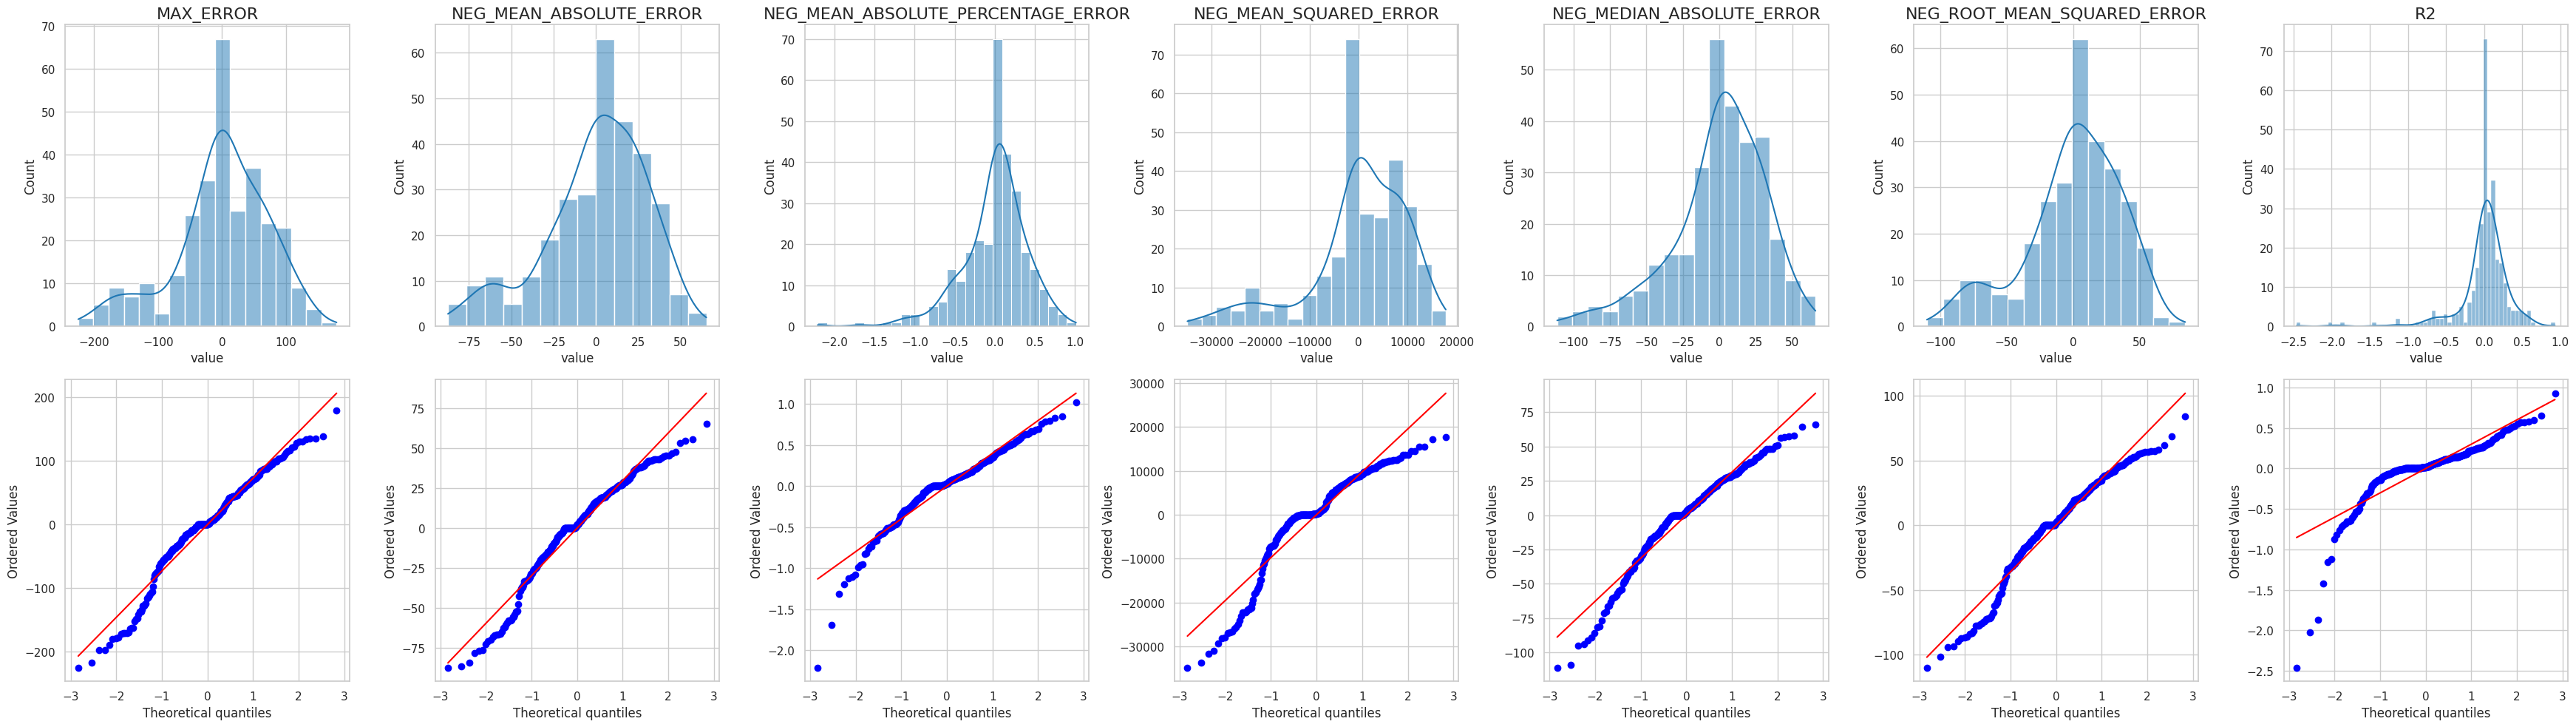

In [11]:
StatisticalAnalysis.check_normality(report_df=cv_result)

In [12]:
StatisticalAnalysis.check_normality(report_df=cv_result, scoring_list=scoring_list2)

NameError: name 'scoring_list2' is not defined

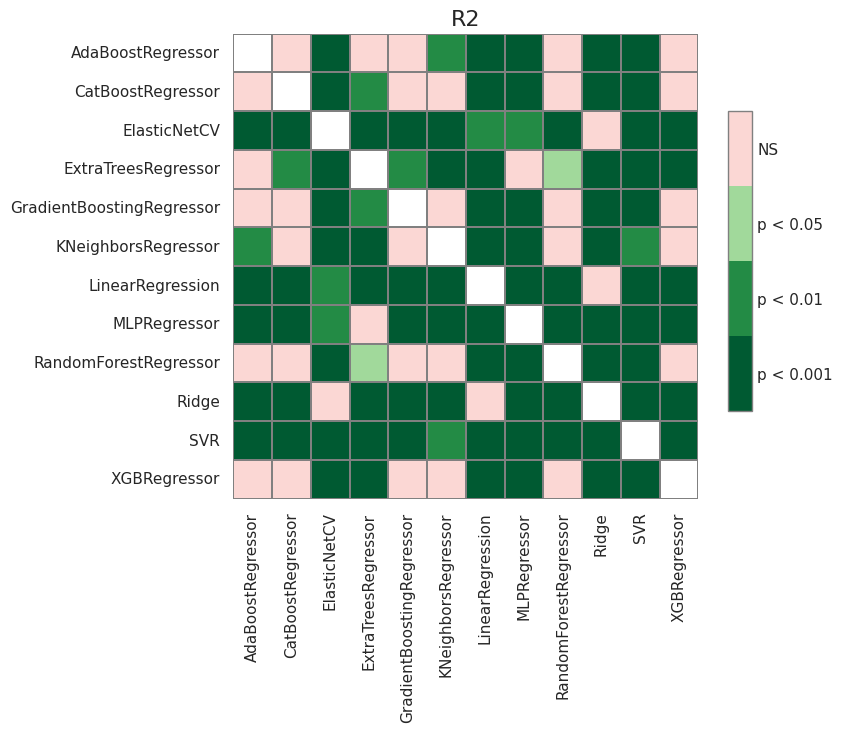

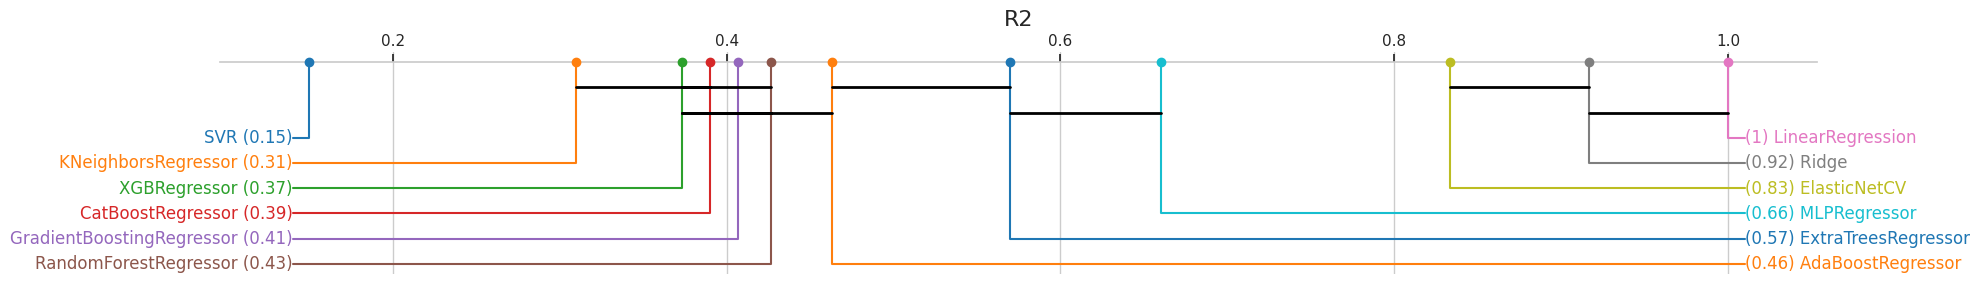

In [ ]:
pc_results, rank = StatisticalAnalysis.posthoc_conover_friedman(report_df=cv_result, scoring_list="r2")

In [ ]:
from IPython.display import display
display(pc_results["r2"])

AdaBoostRegressor  CatBoostRegressor  ElasticNetCV  \
AdaBoostRegressor               1.000000e+00       9.086940e-01  3.993072e-14   
CatBoostRegressor               9.086940e-01       1.000000e+00  2.542999e-19   
ElasticNetCV                    3.993072e-14       2.542999e-19  1.000000e+00   
ExtraTreesRegressor             2.414948e-01       1.053272e-03  1.359926e-07   
GradientBoostingRegressor       1.000000e+00       1.000000e+00  4.139654e-18   
KNeighborsRegressor             9.173992e-03       7.176643e-01  2.064553e-25   
LinearRegression                1.891776e-26       2.624497e-32  3.320352e-03   
MLPRegressor                    2.199887e-04       5.962509e-08  1.889272e-03   
RandomForestRegressor           1.000000e+00       1.000000e+00  1.111361e-16   
Ridge                           4.644163e-20       1.148187e-25  7.133379e-01   
SVR                             1.787989e-10       2.042617e-06  2.772662e-38   
XGBRegressor                    5.735913e-01       1.000000e+00  1.491997e-20   

                           ExtraTreesRegressor  GradientBoostingRegressor  \
AdaBoostRegressor                 2.414948e-01               1.000000e+00   
CatBoostRegressor                 1.053272e-03               1.000000e+00   
ElasticNetCV                      1.359926e-07               4.139654e-18   
ExtraTreesRegressor               1.000000e+00               4.270678e-03   
GradientBoostingRegressor         4.270678e-03               1.000000e+00   
KNeighborsRegressor               2.012033e-07               4.179470e-01   
LinearRegression                  2.409389e-18               5.702602e-31   
MLPRegressor                      5.735913e-01               4.206789e-07   
RandomForestRegressor             1.972138e-02               1.000000e+00   
Ridge                             1.395746e-12               2.255081e-24   
SVR                               1.240723e-17               2.962939e-07   
XGBRegressor                      2.199887e-04               1.000000e+00   

                           KNeighborsRegressor  LinearRegression  \
AdaBoostRegressor                 9.173992e-03      1.891776e-26   
CatBoostRegressor                 7.176643e-01      2.624497e-32   
ElasticNetCV                      2.064553e-25      3.320352e-03   
ExtraTreesRegressor               2.012033e-07      2.409389e-18   
GradientBoostingRegressor         4.179470e-01      5.702602e-31   
KNeighborsRegressor               1.000000e+00      8.006301e-39   
LinearRegression                  8.006301e-39      1.000000e+00   
MLPRegressor                      8.616863e-13      3.717456e-12   
RandomForestRegressor             1.329451e-01      2.304181e-29   
Ridge                             4.814914e-32      7.133379e-01   
SVR                               5.455711e-03      7.739636e-52   
XGBRegressor                      1.000000e+00      1.174323e-33   

                           MLPRegressor  RandomForestRegressor         Ridge  \
AdaBoostRegressor          2.199887e-04           1.000000e+00  4.644163e-20   
CatBoostRegressor          5.962509e-08           1.000000e+00  1.148187e-25   
ElasticNetCV               1.889272e-03           1.111361e-16  7.133379e-01   
ExtraTreesRegressor        5.735913e-01           1.972138e-02  1.395746e-12   
GradientBoostingRegressor  4.206789e-07           1.000000e+00  2.255081e-24   
KNeighborsRegressor        8.616863e-13           1.329451e-01  4.814914e-32   
LinearRegression           3.717456e-12           2.304181e-29  7.133379e-01   
MLPRegressor               1.000000e+00           4.317715e-06  2.962939e-07   
RandomForestRegressor      4.317715e-06           1.000000e+00  7.776561e-23   
Ridge                      2.962939e-07           7.776561e-23  1.000000e+00   
SVR                        2.255081e-24           2.573826e-08  4.322359e-45   
XGBRegressor               7.002836e-09           1.000000e+00  5.690806e-27   

                                    SVR  XGBR

In [ ]:
import os
import unittest
import pandas as pd
import numpy as np
import matplotlib
from tempfile import TemporaryDirectory
from sklearn.datasets import make_classification, make_regression
from ProQSAR.Analysis.statistical_analysis import StatisticalAnalysis
from ProQSAR.ModelDeveloper.model_validation import ModelValidation 


# Functions to create synthetic data
def create_classification_data(n_samples=60, n_features=25, n_informative=10, random_state=42):
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data

def create_regression_data(n_samples=40, n_features=20, n_informative=10, random_state=42):
    X, y = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data

class_data = create_classification_data()
reg_data = create_regression_data()

cv_class = ModelValidation.cross_validation_report(
    class_data, 
    activity_col="Activity", 
    id_col="ID",
    n_splits=5, 
    n_repeats=5,
    save_csv=False
)

cv_reg = ModelValidation.cross_validation_report(
    reg_data, 
    activity_col="Activity", 
    id_col="ID", 
    n_splits=5, 
    n_repeats=5,
    save_csv=False
)

/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 64.
  warnings.warn(
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 64.
  warnings.warn(
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 64.
  warnings.warn(
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 64.
  warnings.warn(
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear

TEST DATA-GENERATOR

In [2]:
import pandas as pd

hiv = pd.read_csv('Data/hiv.csv')
hiv.head(5)


Unnamed: 0 Molecule ChEMBL ID  \
0         686       CHEMBL414850   
1        2030      CHEMBL3805182   
2        7124      CHEMBL3806067   
3        2314      CHEMBL1917873   
4         884       CHEMBL204656   

                                              Smiles Standard Type  \
0  O=C(NCc1ccc(F)cc1)c1nc(N2CCCCS2(=O)=O)c2cccnc2c1O          IC50   
1  NC(=O)c1c2c(c(O)c3ncc(Cc4cccc(Cl)c4F)cc13)C(=O...          IC50   
2  NC(=O)c1c2c(c(O)c3ncc(Cc4cccc(Cl)c4F)cc13)C(=O...          IC50   
3     CC(C)n1c(=O)c(C(=O)NCc2ccc(F)cc2)c(O)c2ncccc21          IC50   
4  COc1cc2c(cc1Cc1cccc(Cl)c1F)c(=O)c(C(=O)O)cn2[C...          IC50   

  Standard Relation  Standard Value Standard Units  pChEMBL Value  \
0               '='             0.5             nM           9.30   
1               '='             0.6             nM           9.22   
2               '='             0.7             nM           9.15   
3               '='             1.0             nM           9.00   
4               '='             1.8             nM           8.74   

  Data Validity Comment Assay Type  \
0                   NaN          B   
1                   NaN          B   
2                   NaN          B   
3                   NaN          B   
4                   NaN          B   

                                   Assay Description  \
0  In vitro concentration required to inhibit the...   
1  Inhibition of pseudotype HIV1 integrase strand...   
2  Inhibition of pseudotype HIV1 integrase strand...   
3  Inhibition of HIV1 integrase strand transfer b...   
4                       Inhibition of HIV1 integrase   

                   Assay Organism Assay Variant Mutation  \
0  Human immunodeficiency virus 1                    NaN   
1  Human immunodeficiency virus 1                    NaN   
2  Human immunodeficiency virus 1                    NaN   
3  Human immunodeficiency virus 1                    NaN   
4  Human immunodeficiency virus 1                    NaN   

                                     Target Name  \
0  Human immunodeficiency virus type 1 integrase   
1  Human immunodeficiency virus type 1 integrase   
2  Human immunodeficiency virus type 1 integrase   
3  Human immunodeficiency virus type 1 integrase   
4  Human immunodeficiency virus type 1 integrase   

                  Target Organism      Document Journal   pChEMBL  \
0  Human immunodeficiency virus 1            J Med Chem  9.301030   
1  Human immunodeficiency virus 1        Eur J Med Chem  9.221849   
2  Human immunodeficiency virus 1        Eur J Med Chem  9.154902   
3  Human immunodeficiency virus 1  Bioorg Med Chem Lett  9.000000   
4  Human immunodeficiency virus 1       Bioorg Med Chem  8.744727   

                                    Canonical_Smiles  
0  O=C(NCc1ccc(F)cc1)c1nc(N2CCCCS2(=O)=O)c2cccnc2c1O  
1  NC(=O)c1c2c(c(O)c3ncc(Cc4cccc(Cl)c4F)cc13)C(=O...  
2  NC(=O)c1c2c(c(O)c3ncc(Cc4cccc(Cl)c4F)cc13)C(=O...  
3     CC(C)n1c(=O)c(C(=O)NCc2ccc(F)cc2)c(O)c2ncccc21  
4  COc1cc2c(cc1Cc1cccc(Cl)c1F)c(=O)c(C(=O)O)cn2[C...

In [3]:
hiv_new = hiv.sample(n=500, random_state=42)
hiv_new.reset_index(inplace=True, drop=True)
display(hiv_new)

Unnamed: 0 Molecule ChEMBL ID  \
0          5288       CHEMBL511423   
1          3742       CHEMBL432775   
2          3656      CHEMBL3805115   
3          3418       CHEMBL507121   
4          3277      CHEMBL2316130   
..          ...                ...   
495        2821       CHEMBL559852   
496        3593       CHEMBL557770   
497        1019      CHEMBL1668664   
498        6126       CHEMBL239484   
499        4272       CHEMBL373035   

                                                Smiles Standard Type  \
0    CCCCCC12CCC(C(=O)Nc3cccc(C(=O)CC(=O)C(=O)O)c3)...          IC50   
1           COc1ccc(/C=C/C(=O)Oc2cccc3ccc(C)nc23)cc1OC          IC50   
2              O=C(NC1CCCCC1)C1C(=O)N(O)C(=O)c2ccccc21          IC50   
3    CN1C(=O)[C@@H](c2cc(Cl)c(O)c(Cl)c2)NC(=O)[C@@H...          IC50   
4      CCOCCNC(=O)c1c(O)c2ncc(Cc3ccc(F)cc3)cc2[nH]c1=O          IC50   
..                                                 ...           ...   
495             O=C1c2ccc(O)c(O)c2C(=O)N1Cc1cccc(F)c1F          IC50   
496           O=C(O)C(=O)CC(=O)c1ccc(NC(=O)c2ccccc2)s1          IC50   
497                      CCCCC1C(=O)N(O)C(=O)c2ccccc21          IC50   
498             O=C(Nc1nccs1)/C(O)=C/C(=O)c1ccc(Cl)cc1          IC50   
499  O=C(O)c1cc(NC(=O)c2cccc3ccccc23)c(C(=O)O)cc1NC...          IC50   

    Standard Relation  Standard Value Standard Units  pChEMBL Value  \
0                 '='         14000.0             nM           4.85   
1                 '='        100000.0             nM           4.00   
2                 '='           700.0             nM           6.16   
3                 '='           600.0             nM           6.22   
4                 '='             9.0             nM           8.05   
..                ...             ...            ...            ...   
495               '='           200.0             nM           6.70   
496               '='          1900.0             nM           5.72   
497               '='         40200.0             nM           4.40   
498               '='         70000.0             nM           4.16   
499               '='         21000.0             nM           4.68   

    Data Validity Comment Assay Type  \
0                     NaN          B   
1                     NaN          B   
2                     NaN          B   
3                     NaN          B   
4                     NaN          B   
..                    ...        ...   
495                   NaN          B   
496                   NaN          B   
497                   NaN          B   
498                   NaN          B   
499                   NaN          B   

                                     Assay Description  \
0    Inhibition of wild-type HIV1 integrase strand ...   
1    Inhibition of HIV1 integrase 3' processing act...   
2    Inhibition of HIV1 integrase using 3'-biotin-l...   
3    Inhibition of HIV1 integrase 3' processing/str...   
4    Inhibition of HIV1 integrase strand transfer a...   
..                                                 ...   
495  Inhibition of HIV1 integrase strand transfer a...   
496  Inhibition of HIV-1 integrase strand transfer ...   
497  Inhibition of HIV-1 integrase after 1 hr by im...   
498  Inhibition of HIV1 integrase strand transfer a...   
499  Inhibition of strand transfer catalytic activi...   

                     Assay Organism Assay Variant Mutation  \
0    Human immunodeficiency virus 1                    NaN   
1    Human immunodeficiency virus 1                    NaN   
2    Human immunodeficiency virus 1                    NaN   
3    Human immunodeficiency virus 1                    NaN   
4    Human immunodeficiency virus 1                    NaN   
..                              ...                    ...   
495  Human immunodeficiency virus 1                    NaN   
496  Human immunodeficiency virus 1                    NaN   
497  Human immunodeficiency virus 1                    NaN   
498  Human immunodeficiency viru

**DATA GENERATOR

In [4]:
from ProQSAR.data_generator import DataGenerator

smiles_col, id_col, activity_col = "Smiles", "Molecule ChEMBL ID", "pChEMBL Value"

data_generator = DataGenerator(smiles_col=smiles_col, activity_col=activity_col, id_col=id_col)
hiv_fps = data_generator.generate(hiv_new)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[15:46:23] Tautomer enumeration stopped at 568 tautomers: max transforms reached
[15:46:23] Tautomer enumeration stopped at 603 tautomers: max transforms reached
[15:46:24] Tautomer enumeration stopped at 1000 tautomers: max tautomers reached
[15:46:24] Tautomer enumeration stopped at 726 tautomers: max transforms reached
[15:46:24] Tautomer enumeration stopped at 598 tautomers: max transforms reached
[15:46:24] Tautomer enumeration stopped at 1000 tautomers: max tautomers reached
[15:46:24] Tautomer enumeration stopped at 430 tautomers: max transforms reached
[15:46:24] Tautomer enumeration stopped at 455 tautomers: max transforms reached
[15:46:25] Tautomer enumeration stopped at 637 tautomers: max transforms reached
[15:46:26] Tautomer enumeration stopped at 1000 tautomers: max tautomers reached
[15:46:27] Tautomer enumeration stopped at 259 tautomers: max transforms reached
[15:46:27] Tautomer enumeration st

In [5]:
data_generator.__dict__

{'activity_col': 'pChEMBL Value',
 'id_col': 'Molecule ChEMBL ID',
 'smiles_col': 'Smiles',
 'config': <ProQSAR.config.Config at 0x7b7dd45cf510>,
 'standardizer': <ProQSAR.Standardizer.smiles_standardizer.SMILESStandardizer at 0x7b7dd45cdc90>,
 'featurizer': <ProQSAR.Featurizer.feature_generator.FeatureGenerator at 0x7b7df3f8c550>}

In [14]:
data_generator.config.__dict__

{'standardizer': <ProQSAR.Standardizer.smiles_standardizer.SMILESStandardizer at 0x706a555a8cd0>,
 'featurizer': <ProQSAR.Featurizer.feature_generator.FeatureGenerator at 0x706a54fe6590>,
 'splitter': <ProQSAR.Splitter.data_splitter.Splitter at 0x706a55569a50>,
 'duplicate': DuplicateHandler(),
 'missing': MissingHandler(),
 'lowvar': LowVarianceHandler(),
 'univ_outlier': UnivariateOutliersHandler(),
 'kbin': KBinHandler(),
 'multiv_outlier': MultivariateOutliersHandler(),
 'rescaler': Rescaler(),
 'feature_selector': <ProQSAR.FeatureSelector.feature_selector.FeatureSelector at 0x706a553ddf90>,
 'model_dev': <ProQSAR.ModelDeveloper.model_developer.ModelDeveloper at 0x70698ed49e50>}

In [4]:
data_generator.config.standardizer.__dict__

{'smiles_col': 'Smiles',
 'normalize': True,
 'tautomerize': True,
 'remove_salts': False,
 'handle_charges': False,
 'uncharge': False,
 'handle_stereo': True,
 'remove_fragments': False,
 'largest_fragment_only': False,
 'n_jobs': 4}

In [5]:
data_generator.config.featurizer.__dict__

{'mol_col': 'standardized_mol',
 'activity_col': 'pChEMBL Value',
 'id_col': 'Molecule ChEMBL ID',
 'feature_types': ['ECFP4', 'RDK5', 'FCFP4'],
 'save_dir': None,
 'n_jobs': -1,
 'verbose': 1}

In [13]:
data_generator.get_params()

{'datapreprocessor__smiles_col': 'Smiles',
 'datagenerator__activity_col': 'pChEMBL Value',
 'datagenerator__id_col': 'Molecule ChEMBL ID',
 'featuregenerator__mol_col': 'standardized_mol',
 'featuregenerator__activity_col': 'pChEMBL Value',
 'featuregenerator__id_col': 'Molecule ChEMBL ID',
 'featuregenerator__feature_types': ['ECFP4', 'FCFP4', 'RDK5'],
 'featuregenerator__save_dir': None,
 'featuregenerator__n_jobs': -1,
 'featuregenerator__verbose': 1}

In [12]:
hiv_fps['ECFP4']

Molecule ChEMBL ID  pChEMBL Value  0  1  2  3  4  5  6  7  ...  2039  \
0         CHEMBL511423           4.85  0  0  0  0  0  0  0  0  ...     0   
1         CHEMBL432775           4.00  0  0  0  0  0  0  0  0  ...     0   
2        CHEMBL3805115           6.16  0  0  1  0  0  0  0  0  ...     0   
3         CHEMBL507121           6.22  0  0  0  0  0  1  0  0  ...     0   
4        CHEMBL2316130           8.05  0  0  0  0  0  0  0  0  ...     0   
..                 ...            ... .. .. .. .. .. .. .. ..  ...   ...   
495       CHEMBL559852           6.70  0  0  0  0  0  0  0  0  ...     0   
496       CHEMBL557770           5.72  0  0  0  0  0  0  0  0  ...     0   
497      CHEMBL1668664           4.40  0  0  0  0  0  0  0  0  ...     0   
498       CHEMBL239484           4.16  0  0  0  0  0  0  0  0  ...     0   
499       CHEMBL373035           4.68  0  0  0  0  0  0  0  0  ...     0   

     2040  2041  2042  2043  2044  2045  2046  2047  \
0       0     0     0     0     0     0     0     0   
1       0     1     0     0     0     0     0     0   
2       0     0     0     0     0     0     0     0   
3       0     0     0     0     0     0     0     0   
4       0     0     0     0     0     0     0     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   
495     0     0     0     0     0     0     0     0   
496     0     0     0     0     0     0     0     0   
497     0     0     0     0     0     0     0     0   
498     0     0     0     0     0     0     0     0   
499     0     0     0     0     0     0     0     0   

                                   standardized_Smiles  
0    CCCCCC12CCC(C(=O)Nc3cccc(C(=O)CC(=O)C(=O)O)c3)...  
1           COc1ccc(/C=C/C(=O)Oc2cccc3ccc(C)nc23)cc1OC  
2               O=C(NC1CCCCC1)c1c(=O)n(O)c(O)c2ccccc12  
3    CN1C(=O)C(c2cc(Cl)c(O)c(Cl)c2)NC(=O)C2NC(=O)C(...  
4      CCOCCNC(=O)c1c(O)[nH]c2cc(Cc3ccc(F)cc3)cnc2c1=O  
..                                                 ...  
495             O=C1c2ccc(O)c(O)c2C(=O)N1Cc1cccc(F)c1F  
496           O=C(O)C(=O)CC(=O)c1ccc(NC(=O)c2ccccc2)s1  
497                       CCCCc1c(=O)n(O)c(O)c2ccccc12  
498               O=C(CC(=O)c1ccc(Cl)cc1)C(=O)Nc1nccs1  
499  O=C(O)c1cc(NC(=O)c2cccc3ccccc23)c(C(=O)O)cc1NC...  

[500 rows x 2051 columns]

In [1]:
import pandas as pd
hiv_ecffp4 = pd.read_csv('Project/Featurizer/ECFP4.csv')

In [2]:
data = hiv_ecffp4.drop(columns='standardized_Smiles', errors='ignore')
data.head()

Molecule ChEMBL ID  pChEMBL Value  0  1  2  3  4  5  6  7  ...  2038  2039  \
0       CHEMBL511423           4.85  0  0  0  0  0  0  0  0  ...     0     0   
1       CHEMBL432775           4.00  0  0  0  0  0  0  0  0  ...     0     0   
2      CHEMBL3805115           6.16  0  0  1  0  0  0  0  0  ...     0     0   
3       CHEMBL507121           6.22  0  0  0  0  0  1  0  0  ...     0     0   
4      CHEMBL2316130           8.05  0  0  0  0  0  0  0  0  ...     0     0   

   2040  2041  2042  2043  2044  2045  2046  2047  
0     0     0     0     0     0     0     0     0  
1     0     1     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0  

[5 rows x 2050 columns]

In [3]:
import numpy as np
data.iloc[495:,2047:] = np.nan
display(data)

Molecule ChEMBL ID  pChEMBL Value  0  1  2  3  4  5  6  7  ...  2038  \
0         CHEMBL511423           4.85  0  0  0  0  0  0  0  0  ...     0   
1         CHEMBL432775           4.00  0  0  0  0  0  0  0  0  ...     0   
2        CHEMBL3805115           6.16  0  0  1  0  0  0  0  0  ...     0   
3         CHEMBL507121           6.22  0  0  0  0  0  1  0  0  ...     0   
4        CHEMBL2316130           8.05  0  0  0  0  0  0  0  0  ...     0   
..                 ...            ... .. .. .. .. .. .. .. ..  ...   ...   
495       CHEMBL559852           6.70  0  0  0  0  0  0  0  0  ...     0   
496       CHEMBL557770           5.72  0  0  0  0  0  0  0  0  ...     0   
497      CHEMBL1668664           4.40  0  0  0  0  0  0  0  0  ...     0   
498       CHEMBL239484           4.16  0  0  0  0  0  0  0  0  ...     0   
499       CHEMBL373035           4.68  0  0  0  0  0  0  0  0  ...     0   

     2039  2040  2041  2042  2043  2044  2045  2046  2047  
0       0     0     0     0     0     0   0.0   0.0   0.0  
1       0     0     1     0     0     0   0.0   0.0   0.0  
2       0     0     0     0     0     0   0.0   0.0   0.0  
3       0     0     0     0     0     0   0.0   0.0   0.0  
4       0     0     0     0     0     0   0.0   0.0   0.0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
495     0     0     0     0     0     0   NaN   NaN   NaN  
496     0     0     0     0     0     0   NaN   NaN   NaN  
497     0     0     0     0     0     0   NaN   NaN   NaN  
498     0     0     0     0     0     0   NaN   NaN   NaN  
499     0     0     0     0     0     0   NaN   NaN   NaN  

[500 rows x 2050 columns]

**PIPELINE

In [4]:
from ProQSAR.data_preprocessor import DataPreprocessor

preprocessor = DataPreprocessor(activity_col='pChEMBL Value', id_col='Molecule ChEMBL ID')

preprocessor.fit(data)
df, del_col, del_id = preprocessor.transform(data)
display(df)

Molecule ChEMBL ID  pChEMBL Value  0  1  2  3  4  5  6  7  ...  2034  \
0         CHEMBL511423           4.85  0  0  0  0  0  0  0  0  ...     0   
1         CHEMBL432775           4.00  0  0  0  0  0  0  0  0  ...     0   
2        CHEMBL3805115           6.16  0  0  1  0  0  0  0  0  ...     0   
3         CHEMBL507121           6.22  0  0  0  0  0  1  0  0  ...     0   
4        CHEMBL2316130           8.05  0  0  0  0  0  0  0  0  ...     0   
..                 ...            ... .. .. .. .. .. .. .. ..  ...   ...   
494       CHEMBL559852           6.70  0  0  0  0  0  0  0  0  ...     0   
495       CHEMBL557770           5.72  0  0  0  0  0  0  0  0  ...     0   
496      CHEMBL1668664           4.40  0  0  0  0  0  0  0  0  ...     1   
497       CHEMBL239484           4.16  0  0  0  0  0  0  0  0  ...     0   
498       CHEMBL373035           4.68  0  0  0  0  0  0  0  0  ...     0   

     2035  2038  2039  2041  2042  2044  2045  2046  2047  
0       0     0     0     0     0     0     0     0     0  
1       0     0     0     1     0     0     0     0     0  
2       0     0     0     0     0     0     0     0     0  
3       0     0     0     0     0     0     0     0     0  
4       0     0     0     0     0     0     0     0     0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
494     0     0     0     0     0     0     0     0     0  
495     0     0     0     0     0     0     0     0     0  
496     0     0     0     0     0     0     0     0     0  
497     0     0     0     0     0     0     0     0     0  
498     0     0     0     0     0     0     0     0     0  

[490 rows x 1562 columns]

In [5]:
preprocessor.get_params(deep=True)

{'datapreprocessor__activity_col': 'pChEMBL Value',
 'datapreprocessor__id_col': 'Molecule ChEMBL ID',
 'datapreprocessor__deactivate': False,
 'duplicate': DuplicateHandler(activity_col='pChEMBL Value', id_col='Molecule ChEMBL ID'),
 'missing': MissingHandler(activity_col='pChEMBL Value', id_col='Molecule ChEMBL ID'),
 'lowvar': LowVarianceHandler(activity_col='pChEMBL Value', id_col='Molecule ChEMBL ID'),
 'univ_outlier': UnivariateOutliersHandler(activity_col='pChEMBL Value',
                           id_col='Molecule ChEMBL ID'),
 'kbin': KBinHandler(activity_col='pChEMBL Value', id_col='Molecule ChEMBL ID'),
 'multiv_outlier': MultivariateOutliersHandler(activity_col='pChEMBL Value',
                             id_col='Molecule ChEMBL ID'),
 'rescaler': Rescaler(activity_col='pChEMBL Value', id_col='Molecule ChEMBL ID'),
 'duplicate__activity_col': 'pChEMBL Value',
 'duplicate__deactivate': False,
 'duplicate__id_col': 'Molecule ChEMBL ID',
 'duplicate__save_dir': 'Project/Dupli

In [8]:
del_id

['CHEMBL2396768',
 'CHEMBL2012378',
 'CHEMBL2011881',
 'CHEMBL2012380',
 'CHEMBL2396850',
 'CHEMBL2011784',
 'CHEMBL2012008',
 'CHEMBL50605',
 'CHEMBL454134',
 'CHEMBL2012379']

In [9]:
len(del_col)

491

**MetaData

In [1]:
import pandas as pd

hiv = pd.read_csv('Data/hiv.csv')
hiv.head(5)
hiv_new = hiv.sample(n=500, random_state=42)
hiv_new.reset_index(inplace=True, drop=True)
display(hiv_new)


Unnamed: 0 Molecule ChEMBL ID  \
0          5288       CHEMBL511423   
1          3742       CHEMBL432775   
2          3656      CHEMBL3805115   
3          3418       CHEMBL507121   
4          3277      CHEMBL2316130   
..          ...                ...   
495        2821       CHEMBL559852   
496        3593       CHEMBL557770   
497        1019      CHEMBL1668664   
498        6126       CHEMBL239484   
499        4272       CHEMBL373035   

                                                Smiles Standard Type  \
0    CCCCCC12CCC(C(=O)Nc3cccc(C(=O)CC(=O)C(=O)O)c3)...          IC50   
1           COc1ccc(/C=C/C(=O)Oc2cccc3ccc(C)nc23)cc1OC          IC50   
2              O=C(NC1CCCCC1)C1C(=O)N(O)C(=O)c2ccccc21          IC50   
3    CN1C(=O)[C@@H](c2cc(Cl)c(O)c(Cl)c2)NC(=O)[C@@H...          IC50   
4      CCOCCNC(=O)c1c(O)c2ncc(Cc3ccc(F)cc3)cc2[nH]c1=O          IC50   
..                                                 ...           ...   
495             O=C1c2ccc(O)c(O)c2C(=O)N1Cc1cccc(F)c1F          IC50   
496           O=C(O)C(=O)CC(=O)c1ccc(NC(=O)c2ccccc2)s1          IC50   
497                      CCCCC1C(=O)N(O)C(=O)c2ccccc21          IC50   
498             O=C(Nc1nccs1)/C(O)=C/C(=O)c1ccc(Cl)cc1          IC50   
499  O=C(O)c1cc(NC(=O)c2cccc3ccccc23)c(C(=O)O)cc1NC...          IC50   

    Standard Relation  Standard Value Standard Units  pChEMBL Value  \
0                 '='         14000.0             nM           4.85   
1                 '='        100000.0             nM           4.00   
2                 '='           700.0             nM           6.16   
3                 '='           600.0             nM           6.22   
4                 '='             9.0             nM           8.05   
..                ...             ...            ...            ...   
495               '='           200.0             nM           6.70   
496               '='          1900.0             nM           5.72   
497               '='         40200.0             nM           4.40   
498               '='         70000.0             nM           4.16   
499               '='         21000.0             nM           4.68   

    Data Validity Comment Assay Type  \
0                     NaN          B   
1                     NaN          B   
2                     NaN          B   
3                     NaN          B   
4                     NaN          B   
..                    ...        ...   
495                   NaN          B   
496                   NaN          B   
497                   NaN          B   
498                   NaN          B   
499                   NaN          B   

                                     Assay Description  \
0    Inhibition of wild-type HIV1 integrase strand ...   
1    Inhibition of HIV1 integrase 3' processing act...   
2    Inhibition of HIV1 integrase using 3'-biotin-l...   
3    Inhibition of HIV1 integrase 3' processing/str...   
4    Inhibition of HIV1 integrase strand transfer a...   
..                                                 ...   
495  Inhibition of HIV1 integrase strand transfer a...   
496  Inhibition of HIV-1 integrase strand transfer ...   
497  Inhibition of HIV-1 integrase after 1 hr by im...   
498  Inhibition of HIV1 integrase strand transfer a...   
499  Inhibition of strand transfer catalytic activi...   

                     Assay Organism Assay Variant Mutation  \
0    Human immunodeficiency virus 1                    NaN   
1    Human immunodeficiency virus 1                    NaN   
2    Human immunodeficiency virus 1                    NaN   
3    Human immunodeficiency virus 1                    NaN   
4    Human immunodeficiency virus 1                    NaN   
..                              ...                    ...   
495  Human immunodeficiency virus 1                    NaN   
496  Human immunodeficiency virus 1                    NaN   
497  Human immunodeficiency virus 1                    NaN   
498  Human immunodeficiency viru

In [2]:
config.featurizer.get_all_types()

NameError: name 'config' is not defined

In [4]:
from ProQSAR.data_generator import DataGenerator

gen = DataGenerator(activity_col='pChEMBL Value', id_col='Molecule ChEMBL ID', smiles_col="Smiles")

In [6]:
repr(gen.featurizer)

"FeatureGenerator(mol_col='standardized_mol', activity_col='pChEMBL Value', id_col='Molecule ChEMBL ID', feature_types=['ECFP4', 'RDK5', 'FCFP4'], save_dir=None, n_jobs=-1, verbose=1)"

In [5]:
gen.get_params2()

{'activity_col': 'pChEMBL Value',
 'id_col': 'Molecule ChEMBL ID',
 'smiles_col': 'Smiles',
 'config': <ProQSAR.config.Config at 0x7d821552fc50>,
 'standardizer__smiles_col': 'Smiles',
 'standardizer__normalize': True,
 'standardizer__tautomerize': True,
 'standardizer__remove_salts': False,
 'standardizer__handle_charges': False,
 'standardizer__uncharge': False,
 'standardizer__handle_stereo': True,
 'standardizer__remove_fragments': False,
 'standardizer__largest_fragment_only': False,
 'standardizer__n_jobs': 4,
 'standardizer': SMILESStandardizer(smiles_col='Smiles', normalize=True, tautomerize=True, remove_salts=False, handle_charges=False, uncharge=False, handle_stereo=True, remove_fragments=False, largest_fragment_only=False, n_jobs=4),
 'featurizer__mol_col': 'standardized_mol',
 'featurizer__activity_col': 'pChEMBL Value',
 'featurizer__id_col': 'Molecule ChEMBL ID',
 'featurizer__feature_types': ['ECFP4', 'RDK5', 'FCFP4'],
 'featurizer__save_dir': None,
 'featurizer__n_jobs'

In [3]:
gen.get_params()

{'datagenerator': {'activity_col': 'pChEMBL Value',
  'id_col': 'Molecule ChEMBL ID',
  'smiles_col': 'Smiles',
  'config': <ProQSAR.config.Config at 0x7c316b7c0390>,
  'standardizer': <ProQSAR.Standardizer.smiles_standardizer.SMILESStandardizer at 0x7c316c3c1f90>,
  'featurizer': <ProQSAR.Featurizer.feature_generator.FeatureGenerator at 0x7c316bcff250>},
 'standardizer': {'smiles_col': 'Smiles',
  'normalize': True,
  'tautomerize': True,
  'remove_salts': False,
  'handle_charges': False,
  'uncharge': False,
  'handle_stereo': True,
  'remove_fragments': False,
  'largest_fragment_only': False,
  'n_jobs': 4},
 'featurizer': {'mol_col': 'standardized_mol',
  'activity_col': 'pChEMBL Value',
  'id_col': 'Molecule ChEMBL ID',
  'feature_types': ['ECFP4', 'RDK5', 'FCFP4'],
  'save_dir': None,
  'n_jobs': -1,
  'verbose': 1}}

In [1]:
from ProQSAR.optimal_dataset import OptimalDataset
from ProQSAR.config import Config

config = Config(
    featurizer={'feature_types': ['ECFP4', 'RDK5', 'FCFP4']},
    splitter={'option': 'stratified_scaffold'},
)

od = OptimalDataset(activity_col='pChEMBL Value', id_col='Molecule ChEMBL ID', smiles_col="Smiles", scoring_list=["neg_mean_squared_error","max_error"], scoring_target='r2', config=config)

In [3]:
df = od.run(hiv_new)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[19:25:33] Tautomer enumeration stopped at 568 tautomers: max transforms reached
[19:25:33] Tautomer enumeration stopped at 603 tautomers: max transforms reached
[19:25:33] Tautomer enumeration stopped at 1000 tautomers: max tautomers reached
[19:25:33] Tautomer enumeration stopped at 726 tautomers: max transforms reached
[19:25:33] Tautomer enumeration stopped at 598 tautomers: max transforms reached
[19:25:33] Tautomer enumeration stopped at 1000 tautomers: max tautomers reached
[19:25:33] Tautomer enumeration stopped at 430 tautomers: max transforms reached
[19:25:33] Tautomer enumeration stopped at 455 tautomers: max transforms reached
[19:25:35] Tautomer enumeration stopped at 637 tautomers: max transforms reached
[19:25:35] Tautomer enumeration stopped at 1000 tautomers: max tautomers reached
[19:25:36] Tautomer enumeration stopped at 259 tautomers: max transforms reached
[19:25:36] Tautomer enumeration st

In [2]:
od.get_params(deep=True)

{'standardizer__smiles_col': 'Smiles',
 'standardizer__normalize': True,
 'standardizer__tautomerize': True,
 'standardizer__remove_salts': False,
 'standardizer__handle_charges': False,
 'standardizer__uncharge': False,
 'standardizer__handle_stereo': True,
 'standardizer__remove_fragments': False,
 'standardizer__largest_fragment_only': False,
 'standardizer__n_jobs': 4,
 'featurizer__mol_col': 'standardized_mol',
 'featurizer__activity_col': 'pChEMBL Value',
 'featurizer__id_col': 'Molecule ChEMBL ID',
 'featurizer__feature_types': ['ECFP4', 'RDK5', 'FCFP4'],
 'featurizer__save_dir': None,
 'featurizer__n_jobs': -1,
 'featurizer__verbose': 1,
 'splitter': Splitter(option='stratified_scaffold', test_size=0.2, random_state=42, activity_col='pChEMBL Value', smiles_col='standardized_Smiles', n_splits=5),
 'duplicate__activity_col': 'pChEMBL Value',
 'duplicate__deactivate': False,
 'duplicate__id_col': 'Molecule ChEMBL ID',
 'duplicate__save_dir': 'Project/DuplicateHandler',
 'duplicate

In [6]:
od.datapreprocessor.get_params(deep=True)

{'activity_col': 'pChEMBL Value',
 'id_col': 'Molecule ChEMBL ID',
 'deactivate': False,
 'config': <ProQSAR.config.Config at 0x7a30adb8dd10>,
 'duplicate__activity_col': 'pChEMBL Value',
 'duplicate__deactivate': False,
 'duplicate__id_col': 'Molecule ChEMBL ID',
 'duplicate__save_dir': 'Project/DuplicateHandler',
 'duplicate__save_method': False,
 'duplicate__save_trans_data': False,
 'duplicate__trans_data_name': 'trans_data',
 'duplicate': DuplicateHandler(activity_col='pChEMBL Value', id_col='Molecule ChEMBL ID'),
 'missing__activity_col': 'pChEMBL Value',
 'missing__deactivate': False,
 'missing__id_col': 'Molecule ChEMBL ID',
 'missing__imputation_strategy': 'mean',
 'missing__missing_thresh': 40.0,
 'missing__n_neighbors': 5,
 'missing__save_dir': 'Project/MissingHandler',
 'missing__save_method': False,
 'missing__save_trans_data': False,
 'missing__trans_data_name': 'trans_data',
 'missing': MissingHandler(activity_col='pChEMBL Value', id_col='Molecule ChEMBL ID'),
 'lowvar__

In [6]:
od.report

scoring cv_cycle     MACCS    avalon    rdkdes
0   max_error        1 -2.309846 -1.921207 -2.231100
1   max_error        2 -1.987900 -2.226700 -2.043200
2   max_error        3 -2.616650 -2.038333 -2.010300
3   max_error        4 -2.120921 -2.556450 -1.997800
4   max_error        5 -3.177803 -2.690300 -2.160600
..        ...      ...       ...       ...       ...
79         r2       24  0.608720  0.574468  0.556452
80         r2       25  0.539789  0.748958  0.693752
81         r2     mean  0.586066  0.659743  0.601668
82         r2   median  0.598116  0.652076  0.597968
83         r2      std  0.063899  0.069595  0.058904

[84 rows x 5 columns]

In [7]:
df

'avalon'

In [5]:
from IPython.display import display
display(df[0])

'R'

In [7]:
optimal_set = (
    df[0].set_index(["scoring", "cv_cycle"])
    .loc[("r2", "mean")]
    .idxmax()
)
print(optimal_set)

RDK5


{'neg_mean_squared_error': {'result_tab':               group1 group2  meandiff     lower     upper     p-adj  \
  RDK5 - ECFP4    RDK5  ECFP4  0.027932 -0.016174  0.072039  0.285823   
  RDK5 - FCFP4    RDK5  FCFP4  0.030012 -0.014095  0.074119  0.236982   
  ECFP4 - FCFP4  ECFP4  FCFP4  0.002079 -0.042027  0.046186       0.9   
  
                 group1_mean  group2_mean  
  RDK5 - ECFP4     -0.274448     -0.30238  
  RDK5 - FCFP4     -0.274448     -0.30446  
  ECFP4 - FCFP4    -0.302380     -0.30446  ,
  'df_means':            value
  method          
  RDK5   -0.274448
  ECFP4  -0.302380
  FCFP4  -0.304460,
  'df_means_diff': method      RDK5     ECFP4     FCFP4
  method                              
  RDK5    0.000000  0.027932  0.030012
  ECFP4  -0.027932  0.000000  0.002079
  FCFP4  -0.030012 -0.002079  0.000000,
  'pc': method      RDK5     ECFP4     FCFP4
  method                              
  RDK5    1.000000  0.285823  0.236982
  ECFP4   0.285823  1.000000  0.900000
  FCF

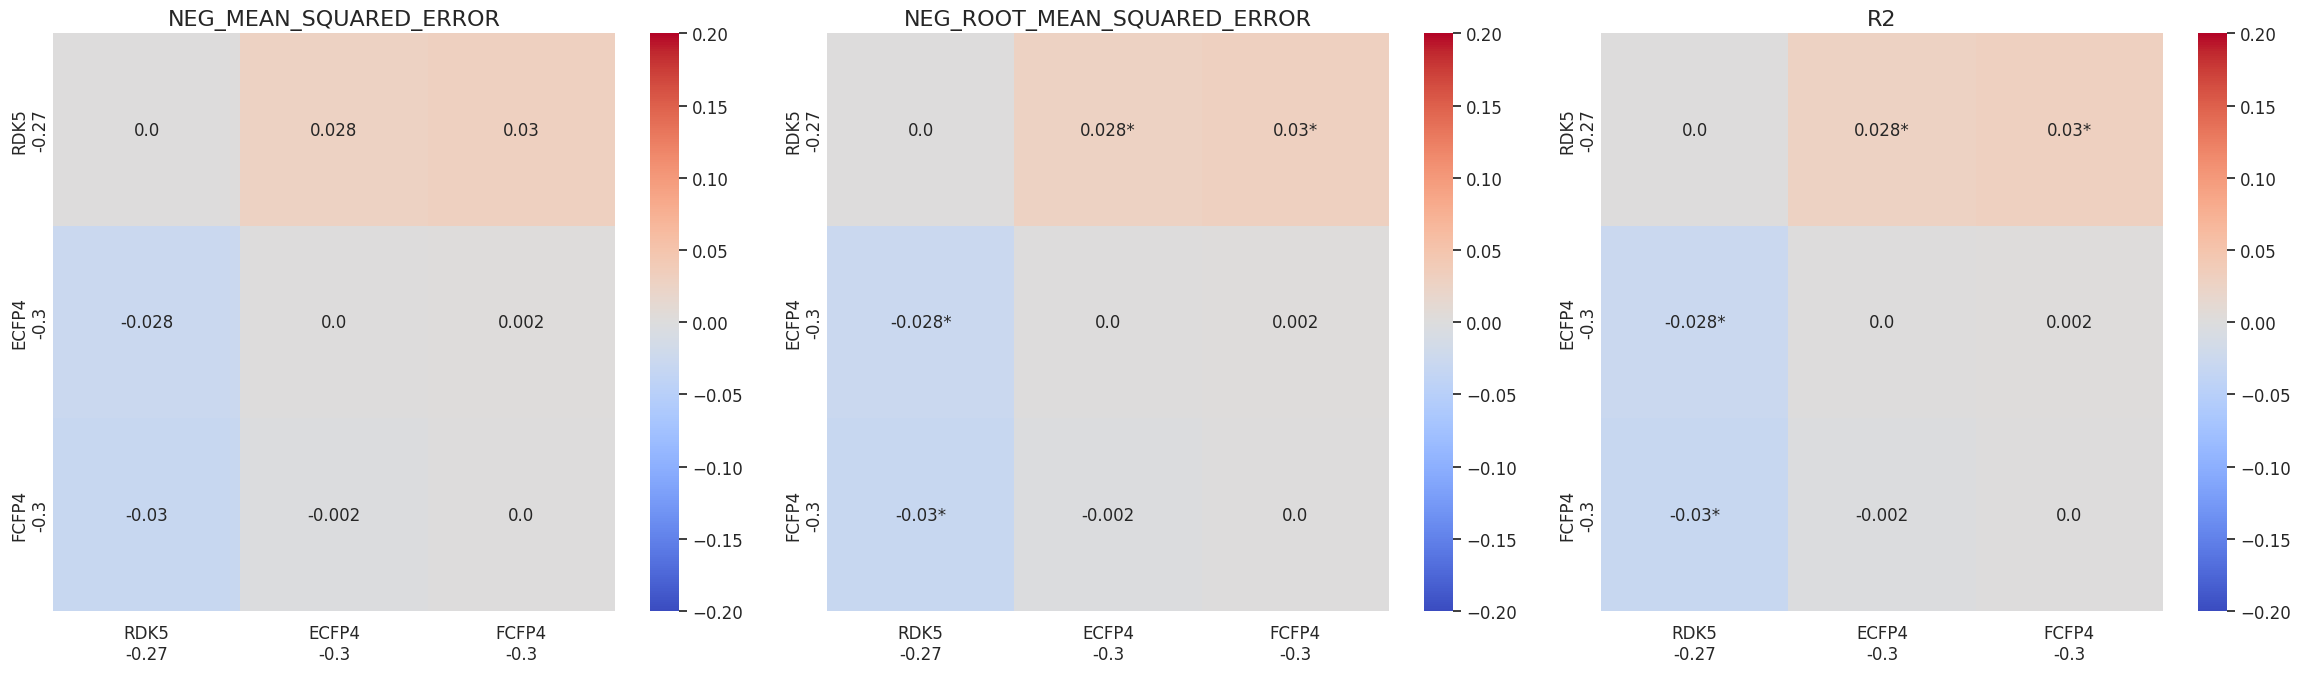

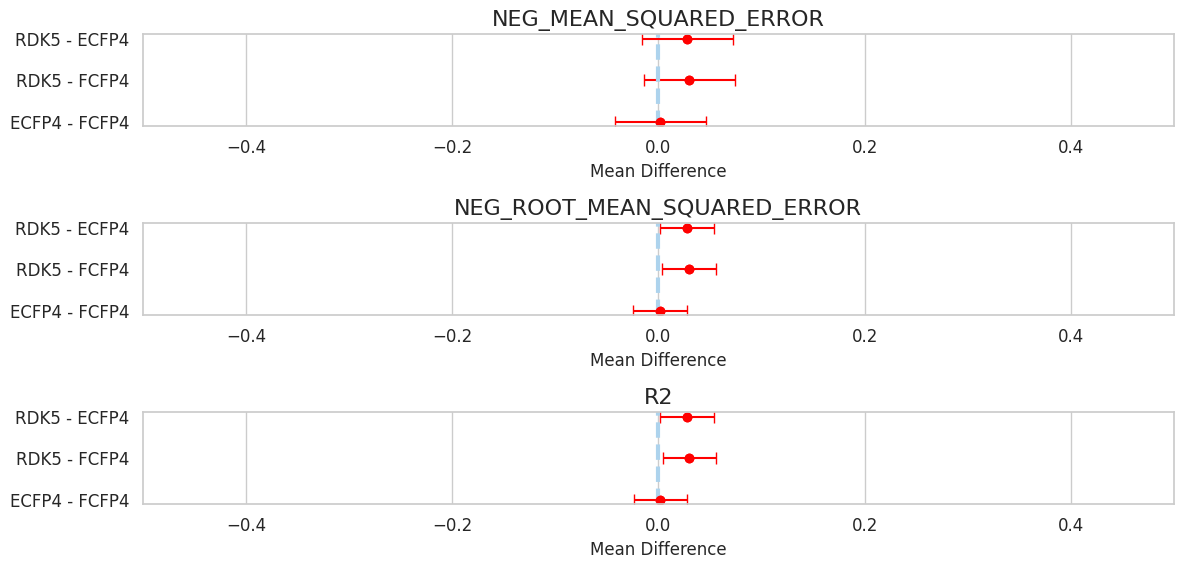

In [17]:
from ProQSAR.Analysis.statistical_analysis import StatisticalAnalysis
StatisticalAnalysis.posthoc_tukeyhsd(report_df=df[0])

/home/labhhc4/Documents/Workspace/Tuyet Minh/ProQSAR/ProQSAR/Analysis/statistical_analysis.py:1189: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


{'neg_mean_squared_error': {'result_tab':               group1 group2  meandiff     lower     upper     p-adj  \
  RDK5 - ECFP4    RDK5  ECFP4  0.030401 -0.023618  0.084421  0.370277   
  RDK5 - FCFP4    RDK5  FCFP4  0.033302 -0.020717  0.087322  0.304672   
  ECFP4 - FCFP4  ECFP4  FCFP4  0.002901 -0.051119  0.056921       0.9   
  
                 group1_mean  group2_mean  
  RDK5 - ECFP4     -0.723844    -0.754245  
  RDK5 - FCFP4     -0.723844    -0.757146  
  ECFP4 - FCFP4    -0.754245    -0.757146  ,
  'df_means':            value
  method          
  RDK5   -0.723844
  ECFP4  -0.754245
  FCFP4  -0.757146,
  'df_means_diff': method      RDK5     ECFP4     FCFP4
  method                              
  RDK5    0.000000  0.030401  0.033302
  ECFP4  -0.030401  0.000000  0.002901
  FCFP4  -0.033302 -0.002901  0.000000,
  'pc': method      RDK5     ECFP4     FCFP4
  method                              
  RDK5    1.000000  0.370277  0.304672
  ECFP4   0.370277  1.000000  0.900000
  FCF

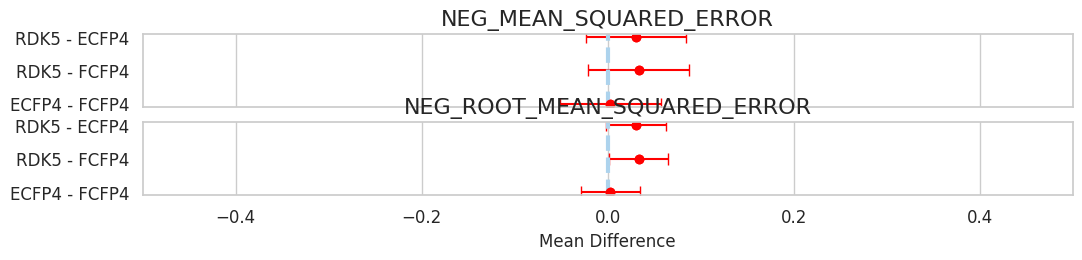

In [49]:
from ProQSAR.Analysis.statistical_analysis import StatisticalAnalysis
StatisticalAnalysis.posthoc_tukeyhsd(report_df=df[0], plot='ci', scoring_list=["neg_mean_squared_error", "neg_root_mean_squared_error"])


({'neg_mean_squared_error':           ECFP4     FCFP4      RDK5
  ECFP4  1.000000  0.803817  0.803817
  FCFP4  0.803817  1.000000  0.632136
  RDK5   0.803817  0.632136  1.000000,
  'neg_root_mean_squared_error':           ECFP4     FCFP4      RDK5
  ECFP4  1.000000  0.803817  0.803817
  FCFP4  0.803817  1.000000  0.632136
  RDK5   0.803817  0.632136  1.000000,
  'r2':           ECFP4     FCFP4      RDK5
  ECFP4  1.000000  0.803817  0.803817
  FCFP4  0.803817  1.000000  0.632136
  RDK5   0.803817  0.632136  1.000000},
 {'neg_mean_squared_error': ECFP4    0.68
  FCFP4    0.60
  RDK5     0.72
  dtype: float64,
  'neg_root_mean_squared_error': ECFP4    0.68
  FCFP4    0.60
  RDK5     0.72
  dtype: float64,
  'r2': ECFP4    0.653333
  FCFP4    0.613333
  RDK5     0.733333
  dtype: float64})

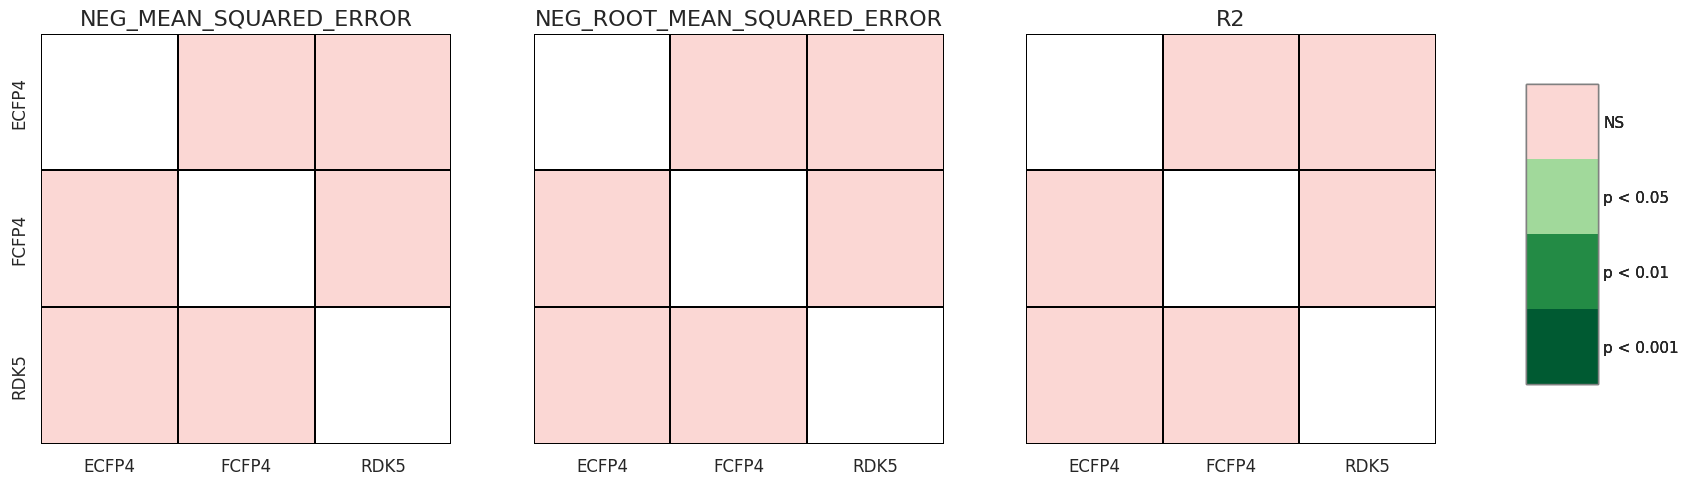

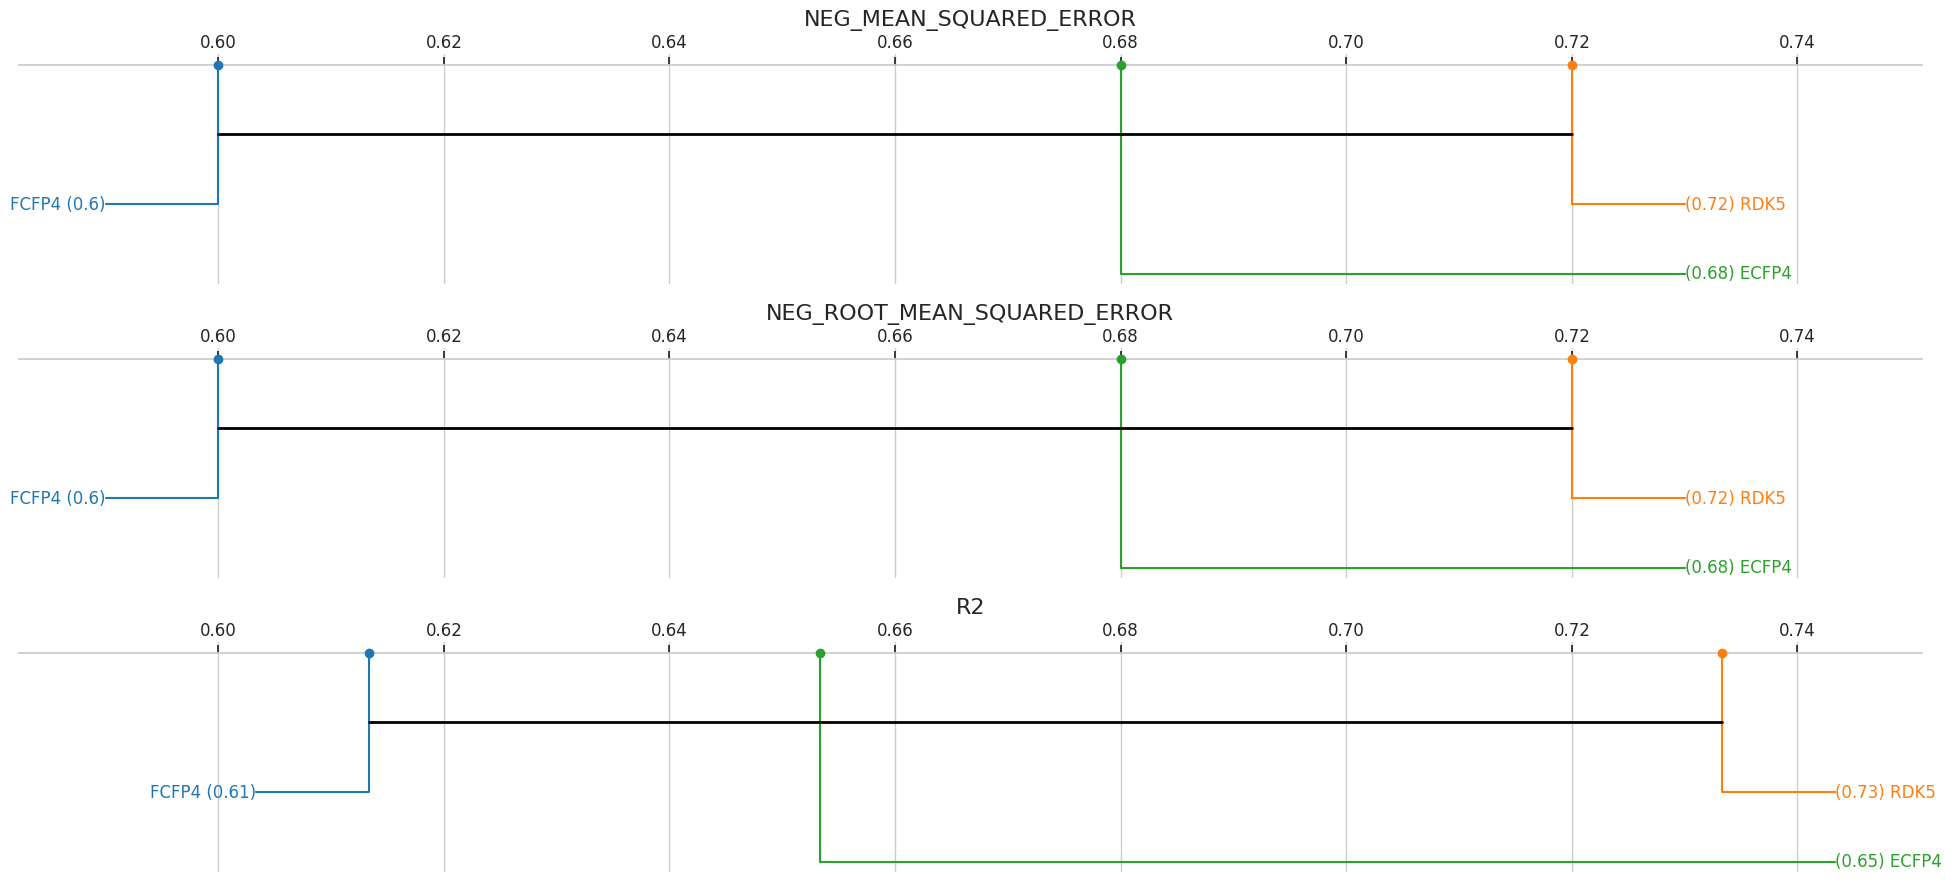

In [36]:
StatisticalAnalysis.posthoc_conover_friedman(report_df=df[0])

In [33]:
print(df[3])

{'ECFP4':     Molecule ChEMBL ID  pChEMBL Value  0  1  2  3  4  5  6  7  ...  2039  \
0         CHEMBL511423           4.85  0  0  0  0  0  0  0  0  ...     0   
1         CHEMBL432775           4.00  0  0  0  0  0  0  0  0  ...     0   
2        CHEMBL3805115           6.16  0  0  1  0  0  0  0  0  ...     0   
3         CHEMBL507121           6.22  0  0  0  0  0  1  0  0  ...     0   
4        CHEMBL2316130           8.05  0  0  0  0  0  0  0  0  ...     0   
..                 ...            ... .. .. .. .. .. .. .. ..  ...   ...   
495       CHEMBL559852           6.70  0  0  0  0  0  0  0  0  ...     0   
496       CHEMBL557770           5.72  0  0  0  0  0  0  0  0  ...     0   
497      CHEMBL1668664           4.40  0  0  0  0  0  0  0  0  ...     0   
498       CHEMBL239484           4.16  0  0  0  0  0  0  0  0  ...     0   
499       CHEMBL373035           4.68  0  0  0  0  0  0  0  0  ...     0   

     2040  2041  2042  2043  2044  2045  2046  2047  \
0       0     0     0 

In [30]:
display(df)

ECFP4                                   RDK5           \
   scoring cv_cycle RandomForestRegressor scoring cv_cycle   
0       r2        1              0.612738      r2        1   
1       r2        2              0.728662      r2        2   
2       r2        3              0.607059      r2        3   
3       r2        4              0.626996      r2        4   
4       r2        5              0.487245      r2        5   
5       r2        6              0.636560      r2        6   
6       r2        7              0.634607      r2        7   
7       r2        8              0.629517      r2        8   
8       r2        9              0.630529      r2        9   
9       r2       10              0.587957      r2       10   
10      r2       11              0.727356      r2       11   
11      r2       12              0.465975      r2       12   
12      r2       13              0.680896      r2       13   
13      r2       14              0.525753      r2       14   
14      r2       15              0.679960      r2       15   
15      r2       16              0.725743      r2       16   
16      r2       17              0.617785      r2       17   
17      r2       18              0.489444      r2       18   
18      r2       19              0.639596      r2       19   
19      r2       20              0.440090      r2       20   
20      r2       21              0.570581      r2       21   
21      r2       22              0.456390      r2       22   
22      r2       23              0.597787      r2       23   
23      r2       24              0.586915      r2       24   
24      r2       25              0.647599      r2       25   
25      r2     mean              0.601350      r2     mean   
26      r2   median              0.617785      r2   median   
27      r2      std              0.081658      r2      std   

                           FCFP4                                 
   RandomForestRegressor scoring cv_cycle RandomForestRegressor  
0               0.658509      r2        1              0.618615  
1               0.654547      r2        2              0.811461  
2               0.599761      r2        3              0.444838  
3               0.686662      r2        4              0.548121  
4               0.626263      r2        5              0.495275  
5               0.596152      r2        6              0.483356  
6               0.610021      r2        7              0.675820  
7               0.680156      r2        8              0.621403  
8               0.579171      r2        9              0.664258  
9               0.608397      r2       10              0.568704  
10              0.696540      r2       11              0.683115  
11              0.625743      r2       12              0.541531  
12              0.766125      r2       13              0.611185  
13              0.402987      r2       14              0.494687  
14              0.629581      r2       15              0.668512  
15              0.639690      r2       16              0.569135  
16              0.594343      r2       17              0.693844  
17              0.620963      r2       18              0.571983  
18              0.683372      r2       19              0.604878  
19              0.627338      r2       20              0.624748  
20              0.529512      r2       21              0.629984  
21              0.534553      r2       22              0.519128  
22              0.646136      r2       23              0.600166  
23              0.729309      r2       24              0.506825  
24              0.582764      r2       25              0.771264  
25              0.624344      r2     mean              0.600913  
26              0.626263      r2   median              0.604878  
27              0.069926      r2      std              0.087308

In [18]:
train, test, deleted_col, deleted_id = od.run(hiv_new)

<class 'pandas.core.frame.DataFrame'>


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[14:41:08] Tautomer enumeration stopped at 568 tautomers: max transforms reached
[14:41:08] Tautomer enumeration stopped at 603 tautomers: max transforms reached
[14:41:08] Tautomer enumeration stopped at 1000 tautomers: max tautomers reached
[14:41:09] Tautomer enumeration stopped at 726 tautomers: max transforms reached
[14:41:09] Tautomer enumeration stopped at 598 tautomers: max transforms reached
[14:41:09] Tautomer enumeration stopped at 430 tautomers: max transforms reached
[14:41:09] Tautomer enumeration stopped at 1000 tautomers: max tautomers reached
[14:41:09] Tautomer enumeration stopped at 455 tautomers: max transforms reached
[14:41:10] Tautomer enumeration stopped at 637 tautomers: max transforms reached
[14:41:11] Tautomer enumeration stopped at 1000 tautomers: max tautomers reached
[14:41:12] Tautomer enumeration stopped at 259 tautomers: max transforms reached
[14:41:12] Tautomer enumeration st

In [23]:
deleted_id

{'train_ECFP4': ['CHEMBL2396768',
  'CHEMBL2011881',
  'CHEMBL2012379',
  'CHEMBL2012378',
  'CHEMBL50605',
  'CHEMBL2011784',
  'CHEMBL2396850',
  'CHEMBL2012380'],
 'test_ECFP4': ['CHEMBL2012008'],
 'train_RDK5': ['CHEMBL1631331', 'CHEMBL396686', 'CHEMBL50605'],
 'test_RDK5': [],
 'train_FCFP4': ['CHEMBL2396768',
  'CHEMBL1682036',
  'CHEMBL507121',
  'CHEMBL3334635',
  'CHEMBL265159',
  'CHEMBL210977',
  'CHEMBL2011881',
  'CHEMBL2012379',
  'CHEMBL2012378',
  'CHEMBL396686',
  'CHEMBL512195',
  'CHEMBL1241171',
  'CHEMBL50605',
  'CHEMBL2011784',
  'CHEMBL2396850',
  'CHEMBL495952',
  'CHEMBL549966',
  'CHEMBL2316113',
  'CHEMBL514422',
  'CHEMBL2012380',
  'CHEMBL1270307'],
 'test_FCFP4': ['CHEMBL2012008']}

In [19]:
train['ECFP4']

Molecule ChEMBL ID  pChEMBL Value  0  1  2  3  4  5  6  7  ...  2030  \
0        CHEMBL4170599           5.70  0  0  0  0  0  0  0  0  ...     0   
1        CHEMBL3819540           4.44  0  0  0  0  0  0  0  0  ...     0   
3        CHEMBL1631332           5.31  0  0  0  0  0  0  0  0  ...     0   
4         CHEMBL419983           4.68  0  0  0  0  1  0  0  0  ...     0   
5          CHEMBL16755           5.20  0  0  0  0  0  0  0  0  ...     0   
..                 ...            ... .. .. .. .. .. .. .. ..  ...   ...   
394       CHEMBL492543           7.68  0  0  0  0  0  0  0  0  ...     0   
395      CHEMBL2407280           7.52  0  0  0  0  0  0  0  0  ...     0   
396      CHEMBL1682067           4.24  0  0  0  0  0  0  0  0  ...     0   
397      CHEMBL3087630           6.01  0  0  0  0  0  0  0  0  ...     0   
398       CHEMBL462344           4.51  0  0  0  0  0  0  0  0  ...     0   

     2031  2032  2033  2034  2038  2039  2041  2042  2045  
0       0     0     0     0     0     0     0     0     0  
1       0     0     0     0     0     0     0     0     0  
3       0     0     1     0     0     0     0     0     0  
4       0     0     0     0     0     0     0     0     0  
5       0     0     0     0     0     0     0     0     0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
394     0     0     0     0     0     0     0     0     0  
395     0     0     0     0     0     0     0     0     0  
396     0     0     0     0     0     0     0     0     0  
397     0     0     0     0     0     0     0     0     0  
398     0     0     0     0     0     0     0     0     0  

[392 rows x 1437 columns]

In [5]:
train['ECFP4']

Molecule ChEMBL ID  pChEMBL Value  0  1  2  3  4  5  6  7  ...  2038  \
0        CHEMBL4170599           5.70  0  0  0  0  0  0  0  0  ...     0   
1        CHEMBL3819540           4.44  0  0  0  0  0  0  0  0  ...     0   
2        CHEMBL2396768           5.70  0  1  0  0  0  0  0  0  ...     0   
3        CHEMBL1631332           5.31  0  0  0  0  0  0  0  0  ...     0   
4         CHEMBL419983           4.68  0  0  0  0  1  0  0  0  ...     0   
..                 ...            ... .. .. .. .. .. .. .. ..  ...   ...   
395       CHEMBL492543           7.68  0  0  0  0  0  0  0  0  ...     0   
396      CHEMBL2407280           7.52  0  0  0  0  0  0  0  0  ...     0   
397      CHEMBL1682067           4.24  0  0  0  0  0  0  0  0  ...     0   
398      CHEMBL3087630           6.01  0  0  0  0  0  0  0  0  ...     0   
399       CHEMBL462344           4.51  0  0  0  0  0  0  0  0  ...     0   

     2039  2040  2041  2042  2043  2044  2045  2046  2047  
0       0     0     0     0     0     0     0     0     0  
1       0     0     0     0     0     0     0     0     0  
2       0     0     0     0     0     0     0     0     0  
3       0     0     0     0     0     0     0     0     0  
4       0     0     0     0     0     0     0     0     0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
395     0     0     0     0     0     0     0     0     0  
396     0     0     0     0     0     0     0     0     0  
397     0     0     0     0     0     0     0     0     0  
398     0     0     0     0     0     0     0     0     0  
399     0     0     0     0     0     0     0     0     0  

[400 rows x 2050 columns]

In [20]:
test['ECFP4']

Molecule ChEMBL ID  pChEMBL Value  0  1  2  3  4  5  6  7  ...  2030  2031  \
0        CHEMBL409643           6.57  0  0  0  0  0  0  0  0  ...     0     0   
1        CHEMBL148364           6.06  0  1  0  0  0  0  0  0  ...     0     0   
2        CHEMBL562335           5.77  0  0  0  0  1  0  0  0  ...     0     0   
3       CHEMBL2180587           6.70  0  0  0  0  0  0  0  0  ...     0     0   
4         CHEMBL29369           5.21  0  1  0  0  0  0  0  0  ...     0     0   
..                ...            ... .. .. .. .. .. .. .. ..  ...   ...   ...   
95      CHEMBL1164684           4.66  0  1  0  0  0  0  0  0  ...     0     0   
96       CHEMBL492329           7.68  0  0  0  0  0  0  0  0  ...     0     0   
97      CHEMBL1761472           4.60  0  0  0  0  0  0  0  0  ...     0     0   
98       CHEMBL360752           6.73  0  0  0  0  0  0  0  0  ...     0     0   
99       CHEMBL338145           4.63  0  0  0  0  1  0  0  0  ...     0     0   

    2032  2033  2034  2038  2039  2041  2042  2045  
0      0     0     0     0     0     0     0     0  
1      0     0     0     0     0     0     0     0  
2      0     0     0     0     0     0     0     0  
3      0     0     0     0     0     0     0     0  
4      0     1     0     0     0     1     0     0  
..   ...   ...   ...   ...   ...   ...   ...   ...  
95     0     0     0     0     0     0     1     0  
96     0     0     0     0     0     0     0     0  
97     0     0     1     0     0     0     1     0  
98     0     0     0     0     0     0     0     0  
99     0     0     0     0     0     0     0     0  

[99 rows x 1437 columns]

In [6]:
test['ECFP4']

Molecule ChEMBL ID  pChEMBL Value  0  1  2  3  4  5  6  7  ...  2038  2039  \
0        CHEMBL409643           6.57  0  0  0  0  0  0  0  0  ...     0     0   
1        CHEMBL148364           6.06  0  1  0  0  0  0  0  0  ...     0     0   
2        CHEMBL562335           5.77  0  0  0  0  1  0  0  0  ...     0     0   
3       CHEMBL2180587           6.70  0  0  0  0  0  0  0  0  ...     0     0   
4         CHEMBL29369           5.21  0  1  0  0  0  0  0  0  ...     0     0   
..                ...            ... .. .. .. .. .. .. .. ..  ...   ...   ...   
95      CHEMBL1164684           4.66  0  1  0  0  0  0  0  0  ...     0     0   
96       CHEMBL492329           7.68  0  0  0  0  0  0  0  0  ...     0     0   
97      CHEMBL1761472           4.60  0  0  0  0  0  0  0  0  ...     0     0   
98       CHEMBL360752           6.73  0  0  0  0  0  0  0  0  ...     0     0   
99       CHEMBL338145           4.63  0  0  0  0  1  0  0  0  ...     0     0   

    2040  2041  2042  2043  2044  2045  2046  2047  
0      0     0     0     0     0     0     0     0  
1      0     0     0     0     0     0     0     0  
2      0     0     0     0     0     0     0     0  
3      0     0     0     0     0     0     0     0  
4      0     1     0     0     0     0     0     0  
..   ...   ...   ...   ...   ...   ...   ...   ...  
95     0     0     1     0     0     0     0     0  
96     0     0     0     0     0     0     0     0  
97     0     0     1     0     0     0     0     0  
98     0     0     0     0     0     0     0     0  
99     0     0     0     0     0     0     0     0  

[100 rows x 2050 columns]

In [7]:
train['RDK5']

Molecule ChEMBL ID  pChEMBL Value  0  1  2  3  4  5  6  7  ...  2038  \
0        CHEMBL4170599           5.70  1  1  0  0  0  1  0  0  ...     1   
1        CHEMBL3819540           4.44  1  0  0  1  0  1  1  0  ...     0   
2        CHEMBL2396768           5.70  1  0  1  0  0  1  0  0  ...     1   
3        CHEMBL1631332           5.31  1  0  0  0  0  1  0  0  ...     0   
4         CHEMBL419983           4.68  1  0  1  1  0  1  0  0  ...     0   
..                 ...            ... .. .. .. .. .. .. .. ..  ...   ...   
395       CHEMBL492543           7.68  1  0  1  0  0  1  0  0  ...     0   
396      CHEMBL2407280           7.52  1  0  0  1  0  1  0  0  ...     0   
397      CHEMBL1682067           4.24  0  0  0  0  0  0  0  0  ...     0   
398      CHEMBL3087630           6.01  1  0  0  0  0  1  1  0  ...     1   
399       CHEMBL462344           4.51  1  0  1  1  1  1  1  0  ...     0   

     2039  2040  2041  2042  2043  2044  2045  2046  2047  
0       0     0     1     1     0     0     0     0     1  
1       0     1     1     0     0     0     0     0     0  
2       0     0     0     0     0     0     0     0     1  
3       0     0     1     0     0     0     0     0     0  
4       0     0     1     1     1     1     0     0     1  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
395     0     1     1     1     0     1     0     0     1  
396     0     0     1     1     0     0     0     0     1  
397     0     0     0     0     0     0     0     0     1  
398     0     0     0     0     0     0     0     0     0  
399     0     0     1     0     0     1     0     0     1  

[400 rows x 2050 columns]

In [10]:
a = ["a"]
b = ["b"]
c = {"a": "b", "c": "d"}
e = list(c.keys())
d = e + b

scoring cv_cycle  GradientBoosting  LogisticRegression  RandomForest  \
0   accuracy        1          0.550000            0.550000      0.500000   
1   accuracy        2          0.575000            0.525000      0.475000   
2   accuracy        3          0.600000            0.625000      0.625000   
3   accuracy        4          0.525000            0.500000      0.575000   
4   accuracy        5          0.500000            0.575000      0.525000   
5   accuracy        6          0.400000            0.500000      0.500000   
6   accuracy        7          0.400000            0.525000      0.475000   
7   accuracy        8          0.575000            0.650000      0.550000   
8   accuracy        9          0.500000            0.600000      0.500000   
9   accuracy       10          0.375000            0.500000      0.550000   
10  accuracy       11          0.550000            0.550000      0.600000   
11  accuracy       12          0.550000            0.575000      0.550000   
12  accuracy       13          0.500000            0.450000      0.550000   
13  accuracy       14          0.525000            0.550000      0.475000   
14  accuracy       15          0.650000            0.500000      0.600000   
15  accuracy     mean          0.518333            0.545000      0.536667   
16  accuracy   median          0.525000            0.550000      0.550000   
17  accuracy      std          0.074424            0.051801      0.047317   
18   roc_auc        1          0.518797            0.573935      0.478697   
19   roc_auc        2          0.596491            0.593985      0.595238   
20   roc_auc        3          0.651629            0.659148      0.626566   
21   roc_auc        4          0.576441            0.486216      0.573935   
22   roc_auc        5          0.538847            0.634085      0.541353   
23   roc_auc        6          0.418546            0.531328      0.498747   
24   roc_auc        7          0.423559            0.516291      0.493734   
25   roc_auc        8          0.646617            0.619048      0.617794   
26   roc_auc        9          0.521303            0.671679      0.543860   
27   roc_auc       10          0.428571            0.548872      0.472431   
28   roc_auc       11          0.583960            0.551378      0.625313   
29   roc_auc       12          0.563910            0.568922      0.532581   
30   roc_auc       13          0.488722            0.473684      0.507519   
31   roc_auc       14          0.508772            0.573935      0.521303   
32   roc_auc       15          0.699248            0.543860      0.654135   
33   roc_auc     mean          0.544361            0.569758      0.552214   
34   roc_auc   median          0.538847            0.568922      0.541353   
35   roc_auc      std          0.082080            0.056308      0.057422   

         SVC  
0   0.400000  
1   0.500000  
2   0.600000  
3   0.550000  
4   0.475000  
5   0.500000  
6   0.450000  
7   0.575000  
8   0.475000  
9   0.575000  
10  0.475000  
11  0.525000  
12  0.450000  
13  0.575000  
14  0.550000  
15  0.511667  
16  0.500000  
17  0.056174  
18  0.486216  
19  0.553885  
20  0.558897  
21  0.508772  
22  0.536341  
23  0.436090  
24  0.556391  
25  0.641604  
26  0.561404  
27  0.523810  
28  0.568922  
29  0.563910  
30  0.468672  
31  0.556391  
32  0.566416  
33  0.539181  
34  0.556391  
35  0.047605

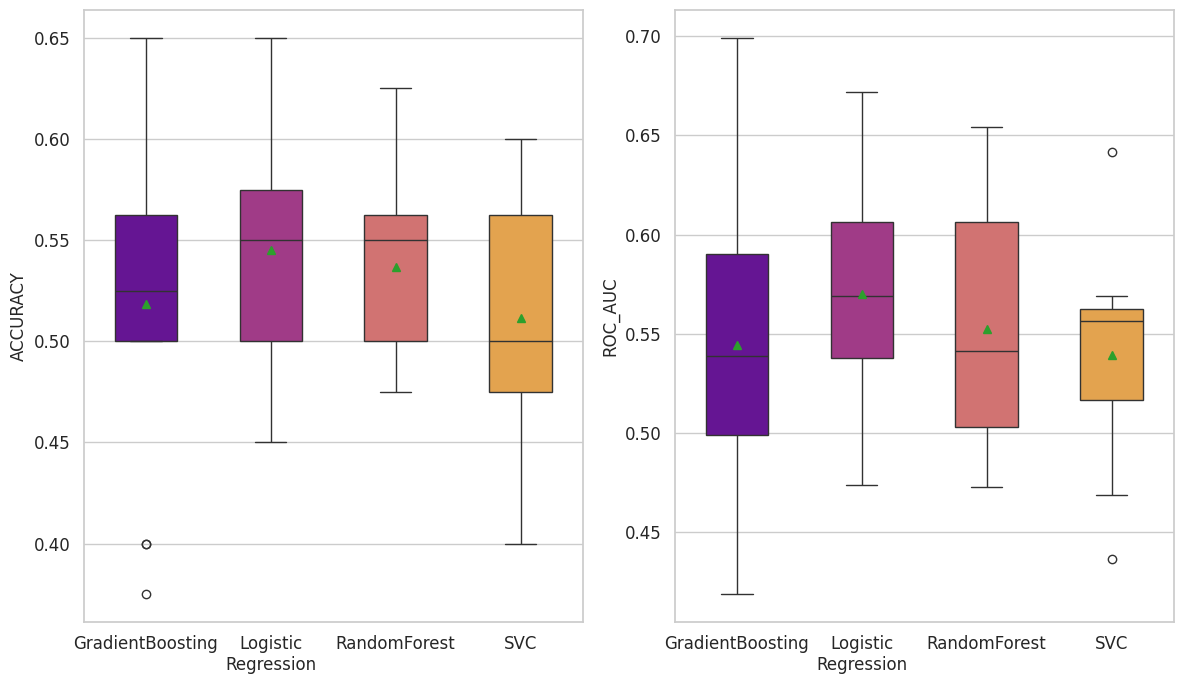

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from ProQSAR.ModelDeveloper.model_validation import ModelValidation  

# Generate a synthetic dataset
np.random.seed(42)
data_size = 200
data = pd.DataFrame({
    'Feature1': np.random.randn(data_size),
    'Feature2': np.random.randn(data_size),
    'Feature3': np.random.randn(data_size),
    'Feature4': np.random.randn(data_size),
    'Feature5': np.random.randn(data_size),
    'Activity': np.random.choice([0, 1], size=data_size),  # Binary classification target
    'ID': np.arange(1, data_size + 1)  # Unique ID column
})

# Define models to compare
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42)
}

# Run cross-validation report
cv_results = ModelValidation.cross_validation_report(
    data=data,
    activity_col="Activity",
    id_col="ID",
    add_model=models,
    select_model=["LogisticRegression", "SVC"],
    scoring_list=["accuracy", "roc_auc"],  # Specify scoring metrics
    n_splits=5,
    n_repeats=3,
    visualize="box",  # Choose visualization type
    save_fig=False,  # Don't save the figure, just display it
    save_csv=False  # Don't save CSV output
)

cv_results

/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=20 is greater than n_features=5. All the features will be returned.
  warnings.warn(
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=20 is greater than n_features=5. All the features will be returned.
  warnings.warn(
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


scoring cv_cycle  AdaBoostClassifier     Anova  ExtraTreesClassifier  \
0    accuracy        1            0.525000  0.500000              0.500000   
1    accuracy        2            0.625000  0.475000              0.650000   
2    accuracy        3            0.550000  0.625000              0.500000   
3    accuracy        4            0.500000  0.575000              0.575000   
4    accuracy        5            0.425000  0.525000              0.600000   
..        ...      ...                 ...       ...                   ...   
247   roc_auc       24            0.587719  0.487469              0.591479   
248   roc_auc       25            0.625313  0.479950              0.484962   
249   roc_auc     mean            0.554386  0.548922              0.573434   
250   roc_auc   median            0.568922  0.541353              0.568922   
251   roc_auc      std            0.077489  0.058363              0.074805   

     GradientBoostingClassifier  LogisticRegression  MutualInformation  \
0                      0.575000            0.525000           0.500000   
1                      0.600000            0.550000           0.475000   
2                      0.525000            0.525000           0.625000   
3                      0.650000            0.500000           0.575000   
4                      0.575000            0.525000           0.525000   
..                          ...                 ...                ...   
247                    0.602757            0.604010           0.487469   
248                    0.580201            0.406015           0.479950   
249                    0.584962            0.525363           0.548922   
250                    0.581454            0.555138           0.541353   
251                    0.061942            0.094473           0.058363   

         NoFS  RandomForestClassifier  XGBClassifier  
0    0.500000                0.400000       0.475000  
1    0.475000                0.625000       0.575000  
2    0.625000                0.575000       0.625000  
3    0.575000                0.650000       0.625000  
4    0.525000                0.525000       0.475000  
..        ...                     ...            ...  
247  0.487469                0.441103       0.451128  
248  0.479950                0.563910       0.596491  
249  0.548922                0.550576       0.564110  
250  0.541353                0.532581       0.580201  
251  0.058363                0.076639       0.069938  

[252 rows x 11 columns]

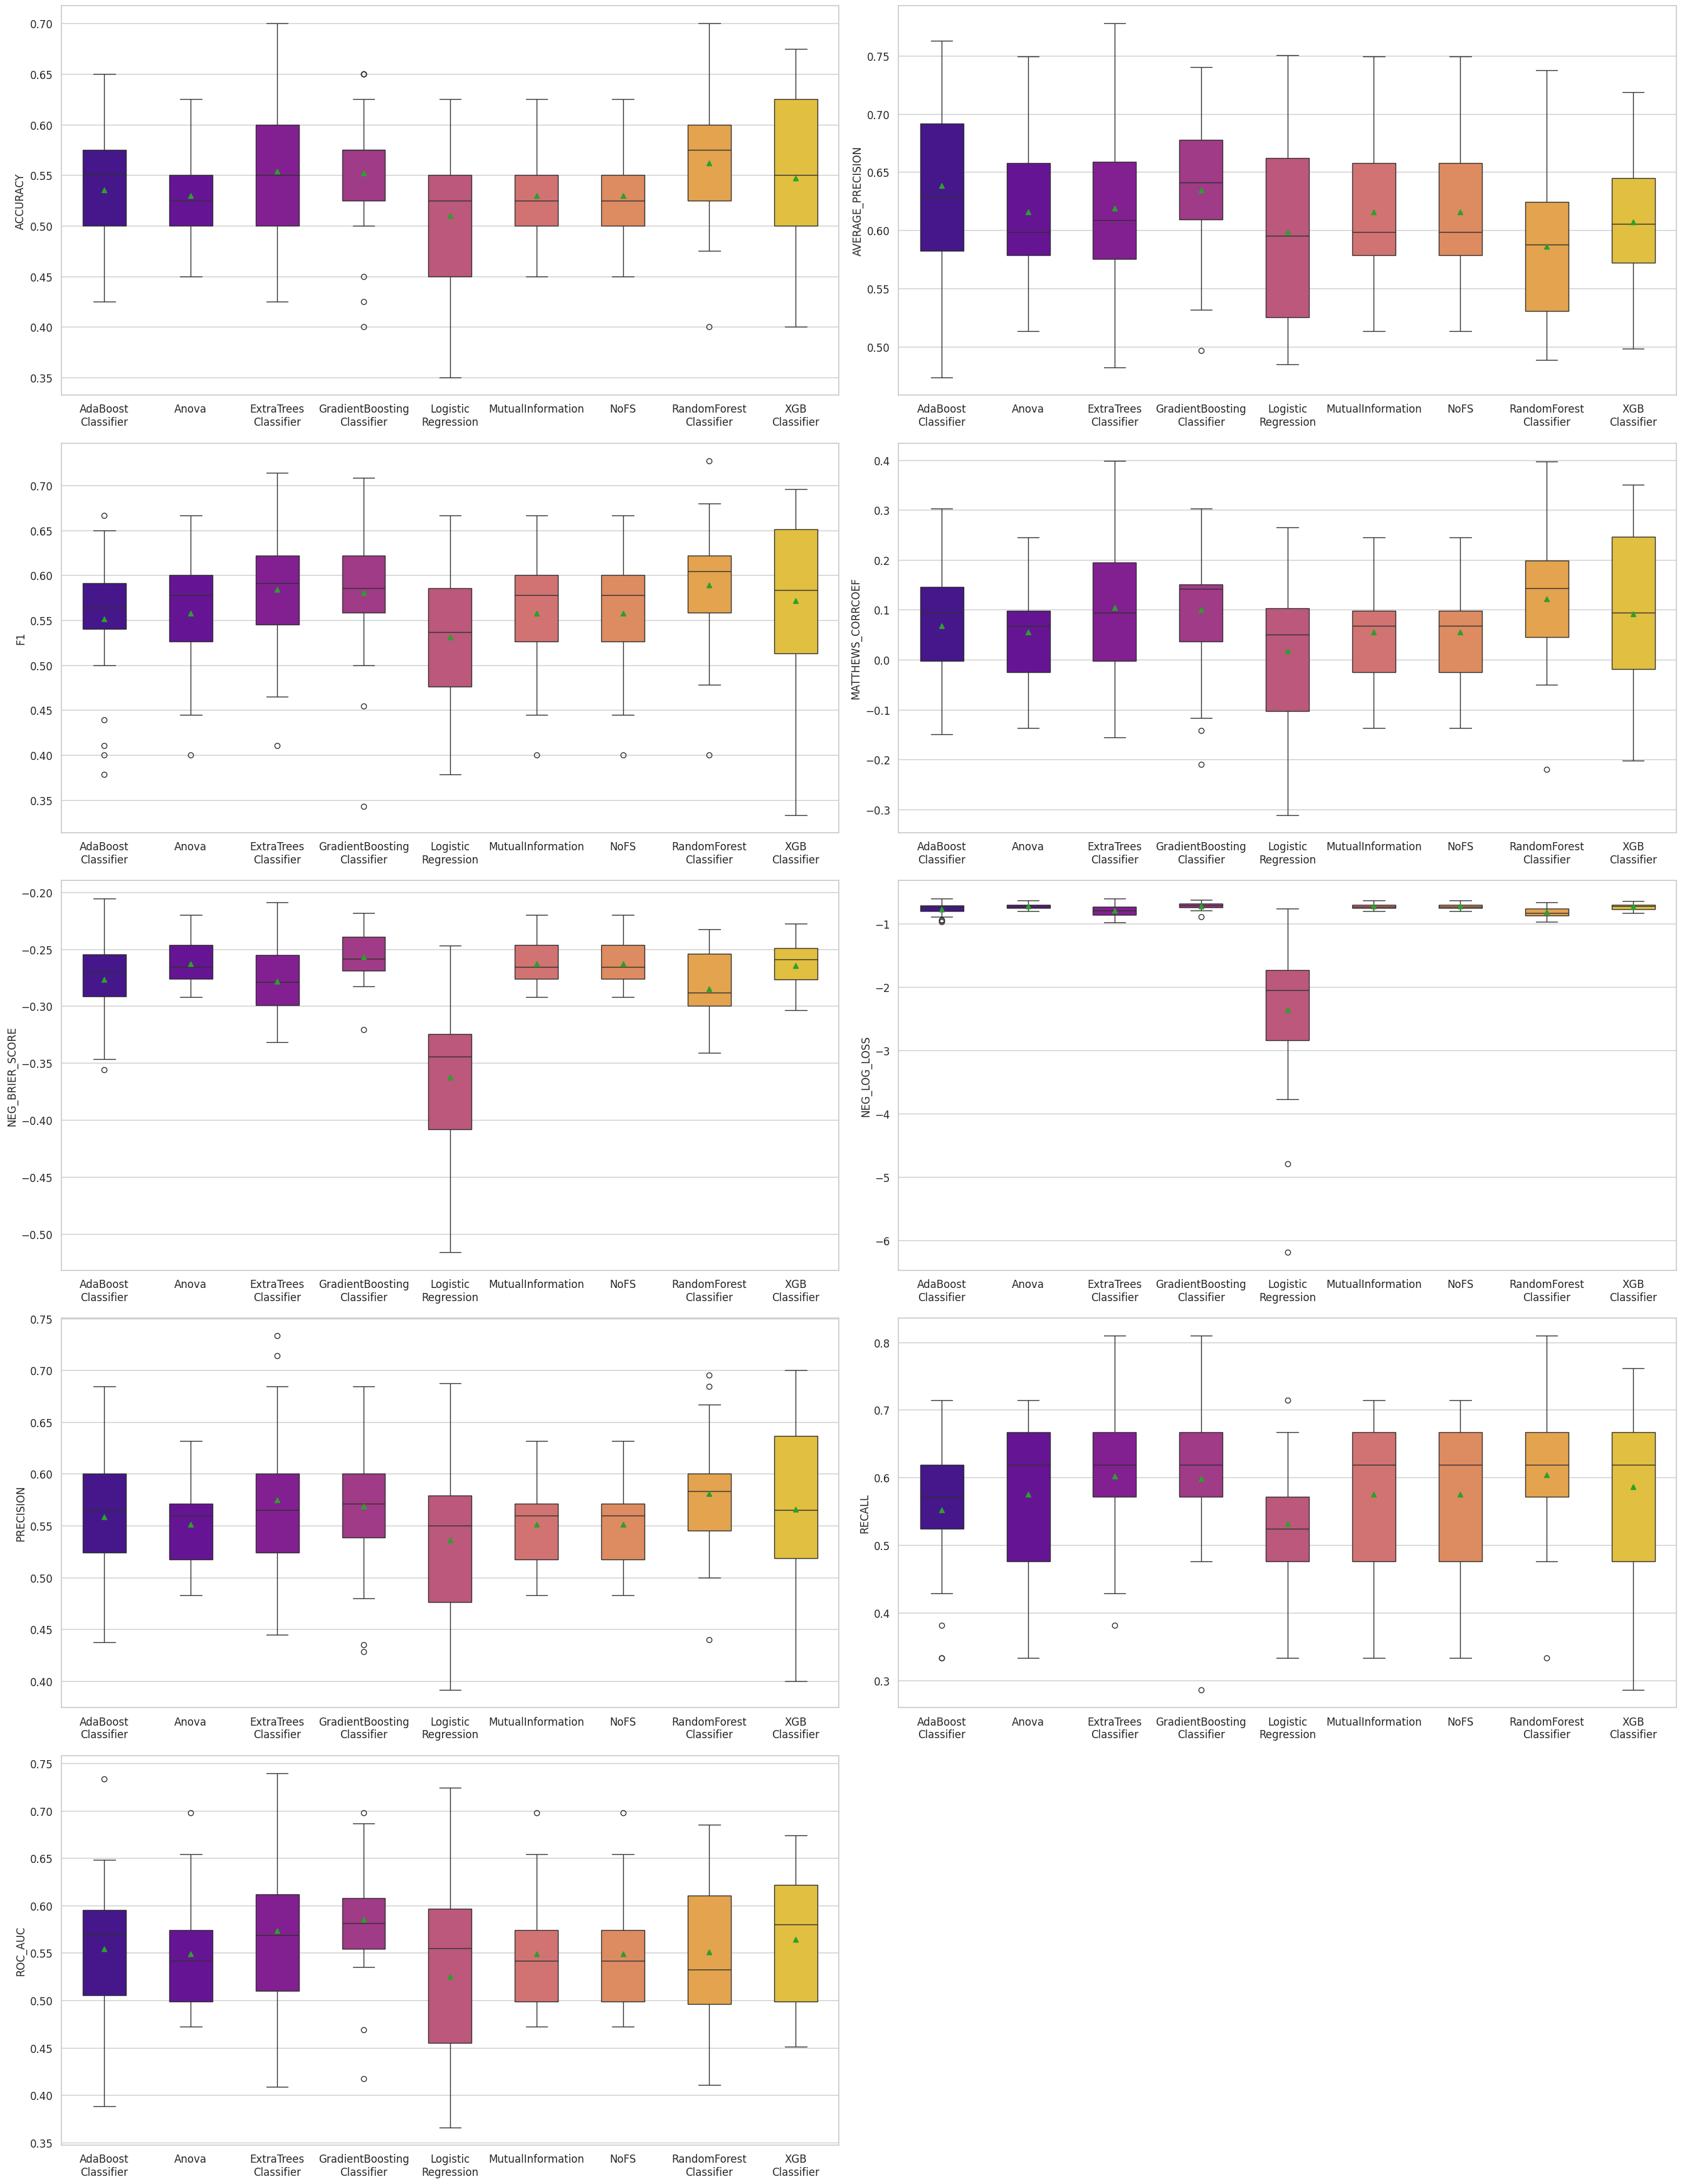

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from ProQSAR.ModelDeveloper.model_developer import ModelDeveloper  
from ProQSAR.FeatureSelector.feature_selector import FeatureSelector

# Generate a synthetic dataset
np.random.seed(42)
data_size = 200
data = pd.DataFrame({
    'Feature1': np.random.randn(data_size),
    'Feature2': np.random.randn(data_size),
    'Feature3': np.random.randn(data_size),
    'Feature4': np.random.randn(data_size),
    'Feature5': np.random.randn(data_size),
    'activity': np.random.choice([0, 1], size=data_size),  # Binary classification target
    'id': np.arange(1, data_size + 1)  # Unique ID column
})

# Define additional models to include in comparison
additional_models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Initialize ModelDeveloper
model_dev = FeatureSelector(
    activity_col="activity",
    id_col="id",
    #add_model=additional_models,
    #select_model="RandomForest",  # Specify the model
    compare=True,
    visualize='box'
)

# Fit the model
model_dev.fit(data)


model_dev.report


In [3]:
print(model_dev.select_method)

RandomForestClassifier


In [17]:
f1 = model_dev.report[model_dev.report['scoring'] == 'f1']

In [20]:
f1[f1['cv_cycle'] == 'mean']

scoring cv_cycle  AdaBoostClassifier  CatBoostClassifier  DummyClassifier  \
81      f1     mean            0.557171            0.549709         0.688525   

    ExtraTreesClassifier  GradientBoostingClassifier  KNeighborsClassifier  \
81              0.584947                    0.554212              0.524325   

    LogisticRegression  MLPClassifier  RandomForest  RandomForestClassifier  \
81            0.593698       0.572842       0.55739                 0.55739   

         SVC  XGBClassifier  
81  0.542488       0.578455

In [4]:
model_dev.__dict__

{'scoring_target': 'f1',
 'scoring_list': None,
 'n_splits': 5,
 'n_repeats': 5,
 'save_cv_report': False,
 'cv_report_name': 'cv_report',
 'visualize': 'box',
 'save_fig': False,
 'fig_prefix': 'cv_graph',
 'activity_col': 'activity',
 'id_col': 'id',
 'select_method': 'RandomForestClassifier',
 'add_method': None,
 'compare': True,
 'save_method': False,
 'save_trans_data': False,
 'trans_data_name': 'trans_data',
 'save_dir': 'Project/FeatureSelector',
 'n_jobs': -1,
 'deactivate': False,
 'feature_selector': SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=42)),
 'task_type': 'C',
 'cv': RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=42),
 'report':       scoring cv_cycle  AdaBoostClassifier     Anova  ExtraTreesClassifier  \
 0    accuracy        1            0.525000  0.500000              0.500000   
 1    accuracy        2            0.625000  0.475000              0.650000   
 2    accuracy        3            0.550000  0.625000          

/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=20 is greater than n_features=5. All the features will be returned.
  warnings.warn(
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=20 is greater than n_features=5. All the features will be returned.
  warnings.warn(
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


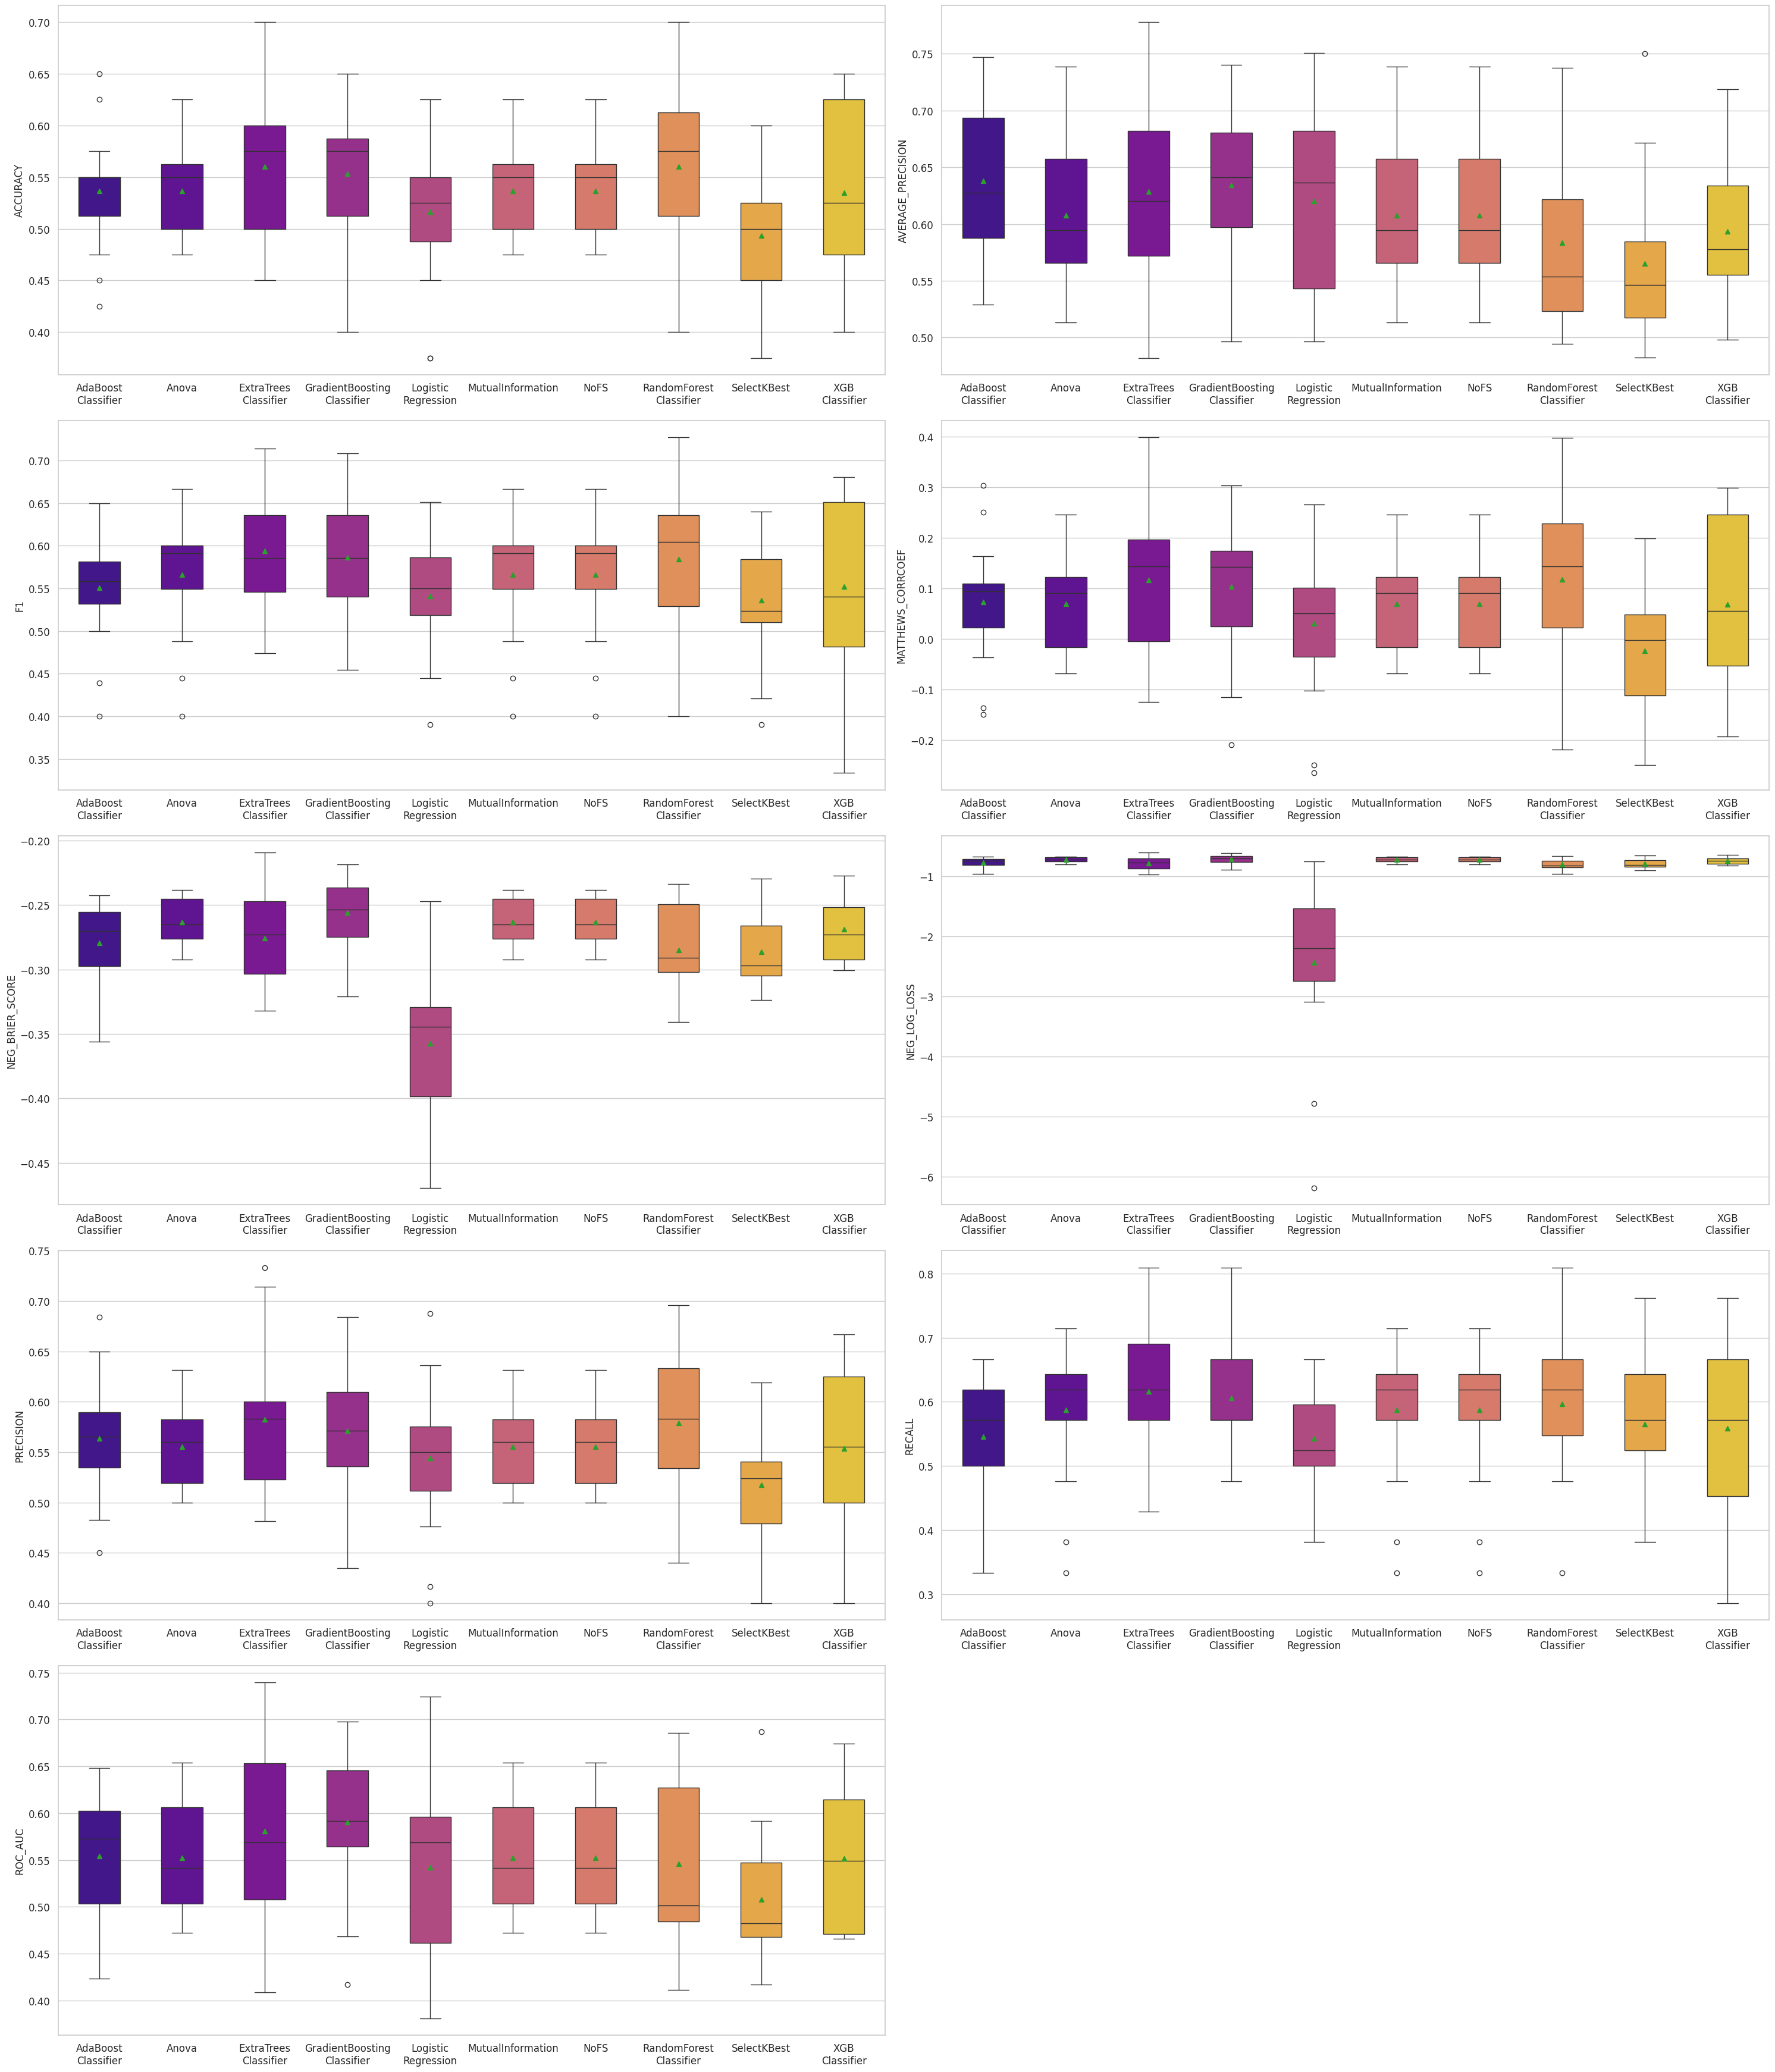

In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from ProQSAR.FeatureSelector.feature_selector import FeatureSelector  # Assuming this module contains FeatureSelector

# Generate a synthetic dataset
np.random.seed(42)
data_size = 200
data = pd.DataFrame({
    'Feature1': np.random.randn(data_size),
    'Feature2': np.random.randn(data_size),
    'Feature3': np.random.randn(data_size),
    'Feature4': np.random.randn(data_size),
    'Feature5': np.random.randn(data_size),
    'activity': np.random.choice([0, 1], size=data_size),  # Binary target variable
    'id': np.arange(1, data_size + 1)  # Unique ID column
})

# Define additional feature selection methods
additional_methods = {
    "SelectKBest": SelectKBest(score_func=f_classif, k=3)
}

# Initialize FeatureSelector
feature_selector = FeatureSelector(
    activity_col="activity",
    id_col="id",
    add_method=additional_methods,
    #select_method="SelectKBest",  # Specify feature selection method
    n_splits=5,
    n_repeats=3,
    save_trans_data=False,  # Don't save transformed data
    visualize="box",  # Enable visualization
)

# Fit and transform the dataset
transformed_data = feature_selector.fit_transform(data)




In [8]:
feature_selector.__dict__

{'scoring_target': 'f1',
 'scoring_list': None,
 'n_splits': 5,
 'n_repeats': 3,
 'save_cv_report': False,
 'cv_report_name': 'cv_report',
 'visualize': 'box',
 'save_fig': False,
 'fig_prefix': 'cv_graph',
 'activity_col': 'activity',
 'id_col': 'id',
 'select_method': 'ExtraTreesClassifier',
 'add_method': {'SelectKBest': SelectKBest(k=3)},
 'compare': True,
 'save_method': False,
 'save_trans_data': False,
 'trans_data_name': 'trans_data',
 'save_dir': 'Project/FeatureSelector',
 'n_jobs': -1,
 'deactivate': False,
 'feature_selector': SelectFromModel(estimator=ExtraTreesClassifier(n_jobs=-1, random_state=42)),
 'task_type': 'C',
 'cv': RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
 'report':       scoring cv_cycle  AdaBoostClassifier     Anova  ExtraTreesClassifier  \
 0    accuracy        1            0.525000  0.500000              0.500000   
 1    accuracy        2            0.625000  0.475000              0.650000   
 2    accuracy        3            0.5